<a href="https://colab.research.google.com/github/Mariavergaraz/Analitica3_Proyecto_fiananzas/blob/main/Trabajo_Finanzas_APG_AVRQ_MIVZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CASO DE ESTUDIO FINANZAS**

En seguros el riesgo se define como la posibilidad de que se presente una pérdida o un daño a una persona, un bien o al patrimonio. Es importante tener en cuenta que esta pérdida o daño debe ser cuantificable en dinero. Para el caso específico del seguro de salud el riesgo está dado por la ocurrencia de un evento que necesita intervención médica, como una enfermedad, un accidente, exámenes de diagnósticos o partos.

Usted es científico de datos en “UdeA Insurance” y se le ha pedido que ayude al departamento de actuaria. Este ha estado recopilando datos históricos sobre los costos asociados a reclamaciones de servicios de salud. Les gustaría poder predecir las utilizaciones y los costos de servicios de salud, y así determinar el precio de un seguro de salud. Su tarea es utilizar los datos disponibles para construir un modelo de tarifación y un ayuda ventas. Recuerde que el departamento de actuaria tendrá más confianza en su trabajo si los resultados tienen sentido, para que no solo considere la precisión predictiva.

Las bases de datos entregadas son las siguiente:

Para la realización de este reto se entregarán los siguientes datos:

* Utilizaciones_Medicas
* Diagnosticos
* Reclamaciones
* Socio_Demograficas
* Regional
* Genero
* Asegurados_Expuestos



Dibujo1.png

## **Lectura de datos - Procesamiento de bases**

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from functools import reduce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
%matplotlib inline
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [ ]:
# Conectar el notebook al drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Lectura de bases de datos desde drive
dfae = pd.read_csv('/content/drive/MyDrive/Trabajos grupo Analítica III/Trabajo 4 - Finanzas/BD_Asegurados_Expuestos.csv', sep=";")
dfd = pd.read_csv('/content/drive/MyDrive/Trabajos grupo Analítica III/Trabajo 4 - Finanzas/BD_Diagnostico.csv', sep=";")
dfg = pd.read_csv('/content/drive/MyDrive/Trabajos grupo Analítica III/Trabajo 4 - Finanzas/BD_Genero.csv', sep=";")
dfr = pd.read_csv('/content/drive/MyDrive/Trabajos grupo Analítica III/Trabajo 4 - Finanzas/BD_Reclamaciones.csv', sep=";")
dfreg = pd.read_csv('/content/drive/MyDrive/Trabajos grupo Analítica III/Trabajo 4 - Finanzas/BD_Regional.csv', sep=";")
dfsd = pd.read_csv('/content/drive/MyDrive/Trabajos grupo Analítica III/Trabajo 4 - Finanzas/BD_SocioDemograficas.csv', sep=";")
dfum = pd.read_csv('/content/drive/MyDrive/Trabajos grupo Analítica III/Trabajo 4 - Finanzas/BD_UtilizacionesMedicas.csv', sep=";")

<ipython-input-228-345d454ed33e>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  dfsd = pd.read_csv('/content/drive/MyDrive/Trabajos grupo Analítica III/Trabajo 4 - Finanzas/BD_SocioDemograficas.csv', sep=";")


In [ ]:
# Verificar tamaño de las bases de datos
print('Tamaño de la base de asegurados expuestos:',dfae.shape)
print('Tamaño de la base de diagnostico:',dfd.shape)
print('Tamaño de la base de genero:',dfg.shape)
print('Tamaño de la base de reclamaciones:',dfr.shape)
print('Tamaño de la base de regional:',dfreg.shape)
print('Tamaño de la base de sociodemografica:',dfsd.shape)
print('Tamaño de la base de utilización médica:',dfum.shape)

Tamaño de la base de asegurados expuestos: (231520, 5)
Tamaño de la base de diagnostico: (3411, 2)
Tamaño de la base de genero: (3, 2)
Tamaño de la base de reclamaciones: (38, 2)
Tamaño de la base de regional: (6, 2)
Tamaño de la base de sociodemografica: (225776, 9)
Tamaño de la base de utilización médica: (800232, 6)


In [ ]:
dfae.head()

,Asegurado_Id,Poliza_Id,FECHA_INICIO,FECHA_CANCELACION,FECHA_FIN
0,1213170,113307876,43709,NaN,43814
1,22248110,195410143,43709,43830.0,43830
2,7212095,192799506,43709,43830.0,43830
3,23743715,145500123,43709,43830.0,43830
4,57822199,175415440,43709,43830.0,43830


In [ ]:
dfd.head()

,Diagnostico_Codigo,Diagnostico_Desc
0,9,DIAGNÓSTICO PENDIENTE
1,N649,"TRASTORNO DE LA MAMA, NO ESPECIFICADO"
2,R529,"DOLOR, NO ESPECIFICADO"
3,Z108,OTROS CONTROLES GENERALES DE SALUD DE RUTINA D...
4,R072,DOLOR PRECORDIAL


In [ ]:
dfg.head()

,Sexo_Cd,Sexo_Cd.1
0,-1,Sin Informacion
1,1,F
2,2,M


In [ ]:
dfr.head()

,Reclamacion_Desc,Reclamacion_Cd
0,ANEXO EXEQUIAL,R1
1,ATENCION DEL PARTO,R2
2,ATENCION INTEGRAL DE SALUD MENTAL,R3
3,CIRUGIA AMBULATORIA POR ACCIDENTE,R4
4,CIRUGIA AMBULATORIA POR ENFERMEDAD,R5


In [ ]:
dfreg.head()

,Regional_Id,Regional_desc
0,10,REGIONAL ANTIOQUIA
1,20,REGIONAL CENTRO
2,30,REGIONAL EJE CAFETERO
3,40,REGIONAL NORTE
4,50,REGIONAL OCCIDENTE


In [ ]:
dfsd.head()

,Afiliado_Id,Sexo_Cd,FechaNacimiento,Regional,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR
0,738288,2,28072,40,0,0,0,0,0
1,738294,2,23392,50,0,0,0,0,0
2,738303,1,27177,10,0,0,0,0,0
3,738318,2,15053,50,1,0,1,1,0
4,738323,1,10447,50,0,0,0,1,0


In [ ]:
dfum.head()

,Fecha_Reclamacion,Afiliado_Id,Reclamacion_Cd,Diagnostico_Codigo,Numero_Utilizaciones,Valor_Utilizaciones
0,43766,2668445,R10,9,1,46500
1,43738,4370072,R15,9,2,42408
2,43766,7567894,R14,N649,1,139376
3,43790,9500279,R18,9,1,97758
4,43801,1555984,R15,9,1,25172


In [ ]:
# Verifciar formato de variables y datos faltantes
print('--------- dfae ---------')
print(dfae.info())
print('--------- dfd ---------')
print(dfd.info())
print('--------- dfg ---------')
print(dfg.info())
print('--------- dfr ---------')
print(dfr.info())
print('--------- dfreg ---------')
print(dfreg.info())
print('--------- dfsd ---------')
print(dfsd.info())
print('--------- dfum ---------')
print(dfum.info())

--------- dfae ---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231520 entries, 0 to 231519
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Asegurado_Id       231520 non-null  int64  
 1   Poliza_Id          231520 non-null  int64  
 2   FECHA_INICIO       231520 non-null  int64  
 3   FECHA_CANCELACION  104808 non-null  float64
 4   FECHA_FIN          231520 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 8.8 MB
None
--------- dfd ---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411 entries, 0 to 3410
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Diagnostico_Codigo  3411 non-null   object
 1   Diagnostico_Desc    3411 non-null   object
dtypes: object(2)
memory usage: 53.4+ KB
None
--------- dfg ---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data co

In [ ]:
# Unión de bases de datos sociodemográfica y género
dfsd = pd.merge(dfsd, dfg, on='Sexo_Cd', how='inner')
dfsd

,Afiliado_Id,Sexo_Cd,FechaNacimiento,Regional,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Sexo_Cd.1
0,738288,2,28072,40,0,0,0,0,0,M
1,738294,2,23392,50,0,0,0,0,0,M
2,738318,2,15053,50,1,0,1,1,0,M
3,738348,2,23504,50,0,0,0,0,0,M
4,738364,2,13334,50,0,0,0,1,0,M
...,...,...,...,...,...,...,...,...,...,...
225771,61152094,1,38618,50,0,0,0,0,0,F
225772,61153214,1,38605,20,0,0,0,0,0,F
225773,61157155,1,39646,40,0,0,0,0,0,F
225774,61164245,1,27699,20,0,0,0,0,0,F


In [ ]:
# Renombrar columna de sexo_cod1
dfsd.rename(columns={'Sexo_Cd.1': 'Sexo'}, inplace=True)

# Eliminar columna sexo_cod
dfsd.drop('Sexo', axis=1, inplace=True)

In [ ]:
dfsd

,Afiliado_Id,Sexo_Cd,FechaNacimiento,Regional,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR
0,738288,2,28072,40,0,0,0,0,0
1,738294,2,23392,50,0,0,0,0,0
2,738318,2,15053,50,1,0,1,1,0
3,738348,2,23504,50,0,0,0,0,0
4,738364,2,13334,50,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
225771,61152094,1,38618,50,0,0,0,0,0
225772,61153214,1,38605,20,0,0,0,0,0
225773,61157155,1,39646,40,0,0,0,0,0
225774,61164245,1,27699,20,0,0,0,0,0


In [ ]:
# Frecuencias de la categoría Sexo
print('las frecuencias de la varible sexo: ')
dfsd['Sexo_Cd'].value_counts()

las frecuencias de la varible sexo: 


 1    123299
 2    102476
-1         1
Name: Sexo_Cd, dtype: int64

In [ ]:
# Eliminar categoria 'Sin Informacion'
dfsd.drop(dfsd[dfsd['Sexo_Cd'] == -1].index, inplace=True)

# Verificar que se haya eliminado correctamente la categoria
dfsd['Sexo_Cd'].value_counts()

1    123299
2    102476
Name: Sexo_Cd, dtype: int64

In [ ]:
# Observar categorías de las regiones
print(dfreg['Regional_Id'].unique())
print(dfsd['Regional'].unique())

# Tratar las inconsistencias de la base de datos
dfsd.replace("#N/D", np.nan, inplace = True)
dfsd['Regional']=dfsd['Regional'].astype(float)

[10 20 30 40 50 -1]
[40 50 30 20 10 -1 '50' '10' '20' '40' '30' '-1' '#N/D']


In [ ]:
# Cambiar el nombre de la columna regional en df1
dfsd.rename(columns={'Regional': 'Regional_Id'}, inplace=True)

In [ ]:
# Asociar el código de la región a la región (unión de base de datos dfsd y dfreg)
dfsd = pd.merge(dfsd, dfreg, on='Regional_Id', how='inner')

In [ ]:
# Eliminar columna regional_desc
dfsd.drop('Regional_desc', axis=1, inplace=True)
dfsd

,Afiliado_Id,Sexo_Cd,FechaNacimiento,Regional_Id,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR
0,738288,2,28072,40.0,0,0,0,0,0
1,738377,2,26439,40.0,0,0,0,0,0
2,738435,2,24324,40.0,0,0,0,0,0
3,738553,2,24859,40.0,0,0,0,0,0
4,738789,2,28102,40.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
225769,46462073,1,39032,-1.0,0,0,0,0,0
225770,46897068,1,42593,-1.0,0,0,0,0,0
225771,47505289,1,27174,-1.0,0,0,0,0,0
225772,48503701,1,43007,-1.0,0,0,0,0,0


In [ ]:
# Categotias de la variable región y sus frecuencias
print('las frecuencias de las categorias de la varible region: ')
dfsd['Regional_Id'].value_counts()

las frecuencias de las categorias de la varible region: 


 50.0    109646
 40.0     41713
 20.0     37511
 10.0     29183
 30.0      7670
-1.0         51
Name: Regional_Id, dtype: int64

In [ ]:
# Eliminar categoria 'Sin Informacion'
dfsd.drop(dfsd[dfsd['Regional_Id'] == -1].index, inplace=True)

# Verificar que se haya eliminado correctamente la categoria
dfsd['Regional_Id'].value_counts()

50.0    109646
40.0     41713
20.0     37511
10.0     29183
30.0      7670
Name: Regional_Id, dtype: int64

In [ ]:
# Unión de las bases de datos dfum y dfd
dfum = pd.merge(dfum, dfd, on='Diagnostico_Codigo', how='inner')
dfum

,Fecha_Reclamacion,Afiliado_Id,Reclamacion_Cd,Diagnostico_Codigo,Numero_Utilizaciones,Valor_Utilizaciones,Diagnostico_Desc
0,43766,2668445,R10,9,1,46500,DIAGNÓSTICO PENDIENTE
1,43738,4370072,R15,9,2,42408,DIAGNÓSTICO PENDIENTE
2,43790,9500279,R18,9,1,97758,DIAGNÓSTICO PENDIENTE
3,43801,1555984,R15,9,1,25172,DIAGNÓSTICO PENDIENTE
4,43715,16076764,R10,9,1,111352,DIAGNÓSTICO PENDIENTE
...,...,...,...,...,...,...,...
800227,43714,20678964,R5,Z303,1,1910501,EXTRACCIÓN MENSTRUAL
800228,43778,28813170,R2,O345,1,3246504,ATENCIÓN MATERNA POR OTRAS ANORMALIDADES DEL Ú...
800229,43818,18030004,R25,S16,1,120796,TRAUMATISMO DE TENDÓN Y MÚSCULOS A NIVEL DEL C...
800230,43734,8760763,R23,C570,1,3879548,TUMOR MALIGNO DE LA TROMPA DE FALOPIO


In [ ]:
# Categorías de la variable diagnostico
dfum['Diagnostico_Desc'].unique()

array(['DIAGNÓSTICO PENDIENTE', 'TRASTORNO DE LA MAMA, NO ESPECIFICADO',
       'DOLOR, NO ESPECIFICADO', ...,
       'TRAUMATISMO DE TENDÓN Y MÚSCULOS A NIVEL DEL CUELLO',
       'TUMOR MALIGNO DE LA TROMPA DE FALOPIO',
       'HEMORRAGIA SUBARACNOIDEA DE ARTERIA INTRACRANEAL NO ESPECIFICADA'],
      dtype=object)

In [ ]:
# Unión de las bases de datos dfum y dfr
dfum = pd.merge(dfum, dfr, on='Reclamacion_Cd', how='inner')
dfum

,Fecha_Reclamacion,Afiliado_Id,Reclamacion_Cd,Diagnostico_Codigo,Numero_Utilizaciones,Valor_Utilizaciones,Diagnostico_Desc,Reclamacion_Desc
0,43766,2668445,R10,9,1,46500,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA
1,43715,16076764,R10,9,1,111352,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA
2,43804,12245582,R10,9,1,56916,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA
3,43698,1084274,R10,9,1,56916,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA
4,43670,7638418,R10,9,1,56916,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA
...,...,...,...,...,...,...,...,...
800227,43711,33284060,R19,K050,1,152768,GINGIVITIS AGUDA,ODONTOLOGÍA
800228,43664,44864704,R19,K083,1,50716,RAÍZ DENTAL RETENIDA,ODONTOLOGÍA
800229,43670,26488481,R24,C920,1,6993736,LEUCEMIA MIELOIDE AGUDA,TRATAMIENTO HOSPITALARIO POR TRASPLANTES
800230,43727,45754229,R35,I620,1,12589757,HEMORRAGIA SUBDURAL (AGUDA) (NO TRAUMÁTICA),TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERM...


In [ ]:
# Cambiar el nombre de la columna 'Asegurado_Id' en dfae
dfae.rename(columns={'Asegurado_Id': 'Afiliado_Id'}, inplace=True)

In [ ]:
#union de base de datos dfum y dfae
dfum = pd.merge(dfum, dfae, on='Afiliado_Id', how='inner')
dfum

,Fecha_Reclamacion,Afiliado_Id,Reclamacion_Cd,Diagnostico_Codigo,Numero_Utilizaciones,Valor_Utilizaciones,Diagnostico_Desc,Reclamacion_Desc,Poliza_Id,FECHA_INICIO,FECHA_CANCELACION,FECHA_FIN
0,43766,2668445,R10,9,1,46500,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,141480119,43709,43830.0,43830
1,43739,2668445,R10,9,1,55676,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,141480119,43709,43830.0,43830
2,43719,2668445,R10,9,2,157852,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,141480119,43709,43830.0,43830
3,43728,2668445,R18,9,6,76455,DIAGNÓSTICO PENDIENTE,LABORATORIO CLINICO,141480119,43709,43830.0,43830
4,43715,16076764,R10,9,1,111352,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,83438289,43709,NaN,43830
...,...,...,...,...,...,...,...,...,...,...,...,...
823609,43657,44864704,R19,K028,1,76384,OTRAS CARIES DENTALES ESPECIFICADAS,ODONTOLOGÍA,161211090,43709,43830.0,43830
823610,43656,44864704,R19,K028,1,29512,OTRAS CARIES DENTALES ESPECIFICADAS,ODONTOLOGÍA,126135970,43709,43830.0,43830
823611,43656,44864704,R19,K028,1,29512,OTRAS CARIES DENTALES ESPECIFICADAS,ODONTOLOGÍA,161211090,43709,43830.0,43830
823612,43664,44864704,R19,K083,1,50716,RAÍZ DENTAL RETENIDA,ODONTOLOGÍA,126135970,43709,43830.0,43830


In [ ]:
# Base de datos completa con todas las variables
dff= pd.merge(dfum, dfsd, on='Afiliado_Id', how='inner')
dff

,Fecha_Reclamacion,Afiliado_Id,Reclamacion_Cd,Diagnostico_Codigo,Numero_Utilizaciones,Valor_Utilizaciones,Diagnostico_Desc,Reclamacion_Desc,Poliza_Id,FECHA_INICIO,FECHA_CANCELACION,FECHA_FIN,Sexo_Cd,FechaNacimiento,Regional_Id,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR
0,43766,2668445,R10,9,1,46500,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,141480119,43709,43830.0,43830,1,22999,50.0,0,0,0,1,0
1,43739,2668445,R10,9,1,55676,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,141480119,43709,43830.0,43830,1,22999,50.0,0,0,0,1,0
2,43719,2668445,R10,9,2,157852,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,141480119,43709,43830.0,43830,1,22999,50.0,0,0,0,1,0
3,43728,2668445,R18,9,6,76455,DIAGNÓSTICO PENDIENTE,LABORATORIO CLINICO,141480119,43709,43830.0,43830,1,22999,50.0,0,0,0,1,0
4,43715,16076764,R10,9,1,111352,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,83438289,43709,NaN,43830,2,29564,40.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823612,43657,44864704,R19,K028,1,76384,OTRAS CARIES DENTALES ESPECIFICADAS,ODONTOLOGÍA,161211090,43709,43830.0,43830,2,36288,20.0,0,0,0,0,0
823613,43656,44864704,R19,K028,1,29512,OTRAS CARIES DENTALES ESPECIFICADAS,ODONTOLOGÍA,126135970,43709,43830.0,43830,2,36288,20.0,0,0,0,0,0
823614,43656,44864704,R19,K028,1,29512,OTRAS CARIES DENTALES ESPECIFICADAS,ODONTOLOGÍA,161211090,43709,43830.0,43830,2,36288,20.0,0,0,0,0,0
823615,43664,44864704,R19,K083,1,50716,RAÍZ DENTAL RETENIDA,ODONTOLOGÍA,126135970,43709,43830.0,43830,2,36288,20.0,0,0,0,0,0


In [ ]:
# Observar si hay duplicados para posteriormente borrarlos
dff.duplicated().sum()

0

In [ ]:
# Cambiar todas las variables a letra minúscula
dff.columns = dff.columns.map(str.lower)

# Informacion sobre la base de datos nueva
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 823617 entries, 0 to 823616
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   fecha_reclamacion     823617 non-null  int64  
 1   afiliado_id           823617 non-null  int64  
 2   reclamacion_cd        823617 non-null  object 
 3   diagnostico_codigo    823617 non-null  object 
 4   numero_utilizaciones  823617 non-null  int64  
 5   valor_utilizaciones   823617 non-null  int64  
 6   diagnostico_desc      823617 non-null  object 
 7   reclamacion_desc      823617 non-null  object 
 8   poliza_id             823617 non-null  int64  
 9   fecha_inicio          823617 non-null  int64  
 10  fecha_cancelacion     345795 non-null  float64
 11  fecha_fin             823617 non-null  int64  
 12  sexo_cd               823617 non-null  int64  
 13  fechanacimiento       823617 non-null  int64  
 14  regional_id           823617 non-null  float64
 15  

In [ ]:
#cambiar regional_id por tipo entero
dff['regional_id'] = dff['regional_id'].astype(int)

In [ ]:
from datetime import datetime, timedelta

# Convertir el formato fechas
fecha_base_excel = datetime(1899, 12, 30)
dff['fecha_reclamacion'] = dff['fecha_reclamacion'].apply(lambda x: (fecha_base_excel + timedelta(x)).strftime("%d/%m/%Y"))
dff['fecha_inicio'] = dff['fecha_inicio'].apply(lambda x: (fecha_base_excel + timedelta(x)).strftime("%d/%m/%Y"))
dff['fecha_fin'] = dff['fecha_fin'].apply(lambda x: (fecha_base_excel + timedelta(x)).strftime("%d/%m/%Y"))
dff['fechanacimiento'] = dff['fechanacimiento'].apply(lambda x: (fecha_base_excel + timedelta(x)).strftime("%d/%m/%Y"))
dff['fecha_cancelacion'] = dff['fecha_cancelacion'].apply(lambda x: 'Si' if x>0 else 'No')
dff.rename(columns={'fecha_cancelacion': 'cancelacion'}, inplace=True)

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 823617 entries, 0 to 823616
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   fecha_reclamacion     823617 non-null  object
 1   afiliado_id           823617 non-null  int64 
 2   reclamacion_cd        823617 non-null  object
 3   diagnostico_codigo    823617 non-null  object
 4   numero_utilizaciones  823617 non-null  int64 
 5   valor_utilizaciones   823617 non-null  int64 
 6   diagnostico_desc      823617 non-null  object
 7   reclamacion_desc      823617 non-null  object
 8   poliza_id             823617 non-null  int64 
 9   fecha_inicio          823617 non-null  object
 10  cancelacion           823617 non-null  object
 11  fecha_fin             823617 non-null  object
 12  sexo_cd               823617 non-null  int64 
 13  fechanacimiento       823617 non-null  object
 14  regional_id           823617 non-null  int64 
 15  cancer           

In [ ]:
# Formato de correcto de columnas
dff['fecha_reclamacion'] = pd.to_datetime(dff['fecha_reclamacion'])
dff['fecha_inicio'] = pd.to_datetime(dff['fecha_inicio'])
dff['fecha_fin'] = pd.to_datetime(dff['fecha_fin'])
dff['fechanacimiento'] = pd.to_datetime(dff['fechanacimiento'])
dff['afiliado_id'] = dff['afiliado_id'].astype(str)
dff['poliza_id'] = dff['poliza_id'].astype(str)

<ipython-input-260-9fcd67085cba>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dff['fecha_reclamacion'] = pd.to_datetime(dff['fecha_reclamacion'])
<ipython-input-260-9fcd67085cba>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dff['fecha_inicio'] = pd.to_datetime(dff['fecha_inicio'])
<ipython-input-260-9fcd67085cba>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dff['fecha_fin'] = pd.to_datetime(dff['fecha_fin'])
<ipython-input-260-9fcd67085cba>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This 

In [ ]:
# Edad al momento de la reclamación
import math
dff['edad'] = round(((dff['fecha_inicio'] - dff['fechanacimiento'])/timedelta(days=1))/365,2) # Para convertir a años
# dff['edad'] = dff['edad'].apply(lambda x: math.floor(x))

# Tiempo de reclamación
dff['tiempo_reclamacion'] = ((dff['fecha_reclamacion'] - dff['fecha_inicio'])/timedelta(days=1))

# Tiempofin_reclamación
dff['tiempofin_reclamacion'] = ((dff['fecha_fin'] - dff['fecha_reclamacion'])/timedelta(days=1))


In [ ]:
pd.options.display.max_columns = None
dff.head()

,fecha_reclamacion,afiliado_id,reclamacion_cd,diagnostico_codigo,numero_utilizaciones,valor_utilizaciones,diagnostico_desc,reclamacion_desc,poliza_id,fecha_inicio,cancelacion,fecha_fin,sexo_cd,fechanacimiento,regional_id,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,tiempo_reclamacion,tiempofin_reclamacion
0,2019-10-28,2668445,R10,9,1,46500,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,141480119,2019-01-09,Si,2019-12-31,1,1962-12-19,50,0,0,0,1,0,56.10,292.0,64.0
1,2019-01-10,2668445,R10,9,1,55676,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,141480119,2019-01-09,Si,2019-12-31,1,1962-12-19,50,0,0,0,1,0,56.10,1.0,355.0
2,2019-11-09,2668445,R10,9,2,157852,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,141480119,2019-01-09,Si,2019-12-31,1,1962-12-19,50,0,0,0,1,0,56.10,304.0,52.0
3,2019-09-20,2668445,R18,9,6,76455,DIAGNÓSTICO PENDIENTE,LABORATORIO CLINICO,141480119,2019-01-09,Si,2019-12-31,1,1962-12-19,50,0,0,0,1,0,56.10,254.0,102.0
4,2019-07-09,16076764,R10,9,1,111352,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,83438289,2019-01-09,No,2019-12-31,2,1980-09-12,40,0,0,0,1,0,38.35,181.0,175.0


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 823617 entries, 0 to 823616
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   fecha_reclamacion      823617 non-null  datetime64[ns]
 1   afiliado_id            823617 non-null  object        
 2   reclamacion_cd         823617 non-null  object        
 3   diagnostico_codigo     823617 non-null  object        
 4   numero_utilizaciones   823617 non-null  int64         
 5   valor_utilizaciones    823617 non-null  int64         
 6   diagnostico_desc       823617 non-null  object        
 7   reclamacion_desc       823617 non-null  object        
 8   poliza_id              823617 non-null  object        
 9   fecha_inicio           823617 non-null  datetime64[ns]
 10  cancelacion            823617 non-null  object        
 11  fecha_fin              823617 non-null  datetime64[ns]
 12  sexo_cd                823617 non-null  int6

In [ ]:
# Eliminar registros que tengan edad de reclamación negativos
dff = dff[dff['edad'] >= 0]
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806919 entries, 0 to 823616
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   fecha_reclamacion      806919 non-null  datetime64[ns]
 1   afiliado_id            806919 non-null  object        
 2   reclamacion_cd         806919 non-null  object        
 3   diagnostico_codigo     806919 non-null  object        
 4   numero_utilizaciones   806919 non-null  int64         
 5   valor_utilizaciones    806919 non-null  int64         
 6   diagnostico_desc       806919 non-null  object        
 7   reclamacion_desc       806919 non-null  object        
 8   poliza_id              806919 non-null  object        
 9   fecha_inicio           806919 non-null  datetime64[ns]
 10  cancelacion            806919 non-null  object        
 11  fecha_fin              806919 non-null  datetime64[ns]
 12  sexo_cd                806919 non-null  int6

In [ ]:
# Eliminar registros que tengan tiempo de reclamación negativos
dff = dff[dff['tiempo_reclamacion'] >= 0]
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790403 entries, 0 to 823616
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   fecha_reclamacion      790403 non-null  datetime64[ns]
 1   afiliado_id            790403 non-null  object        
 2   reclamacion_cd         790403 non-null  object        
 3   diagnostico_codigo     790403 non-null  object        
 4   numero_utilizaciones   790403 non-null  int64         
 5   valor_utilizaciones    790403 non-null  int64         
 6   diagnostico_desc       790403 non-null  object        
 7   reclamacion_desc       790403 non-null  object        
 8   poliza_id              790403 non-null  object        
 9   fecha_inicio           790403 non-null  datetime64[ns]
 10  cancelacion            790403 non-null  object        
 11  fecha_fin              790403 non-null  datetime64[ns]
 12  sexo_cd                790403 non-null  int6

In [ ]:
# Eliminar registros que tengan tiempo fin de reclamación negativos
dff = dff[dff['tiempofin_reclamacion'] >= 0]
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773256 entries, 0 to 823616
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   fecha_reclamacion      773256 non-null  datetime64[ns]
 1   afiliado_id            773256 non-null  object        
 2   reclamacion_cd         773256 non-null  object        
 3   diagnostico_codigo     773256 non-null  object        
 4   numero_utilizaciones   773256 non-null  int64         
 5   valor_utilizaciones    773256 non-null  int64         
 6   diagnostico_desc       773256 non-null  object        
 7   reclamacion_desc       773256 non-null  object        
 8   poliza_id              773256 non-null  object        
 9   fecha_inicio           773256 non-null  datetime64[ns]
 10  cancelacion            773256 non-null  object        
 11  fecha_fin              773256 non-null  datetime64[ns]
 12  sexo_cd                773256 non-null  int6

In [ ]:
# Observar si existen fechas de inicio y fin iguales
dff[dff['fecha_fin'] == dff['fecha_inicio']]

,fecha_reclamacion,afiliado_id,reclamacion_cd,diagnostico_codigo,numero_utilizaciones,valor_utilizaciones,diagnostico_desc,reclamacion_desc,poliza_id,fecha_inicio,cancelacion,fecha_fin,sexo_cd,fechanacimiento,regional_id,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,tiempo_reclamacion,tiempofin_reclamacion
63866,2019-08-09,50153988,R30,P073,1,15411970,OTROS RECIÉN NACIDOS PRETÉRMINO,TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD,199409115,2019-08-09,Si,2019-08-09,1,2019-01-10,40,0,0,0,0,0,0.58,0.0,0.0
150252,2019-11-11,50454326,R30,P081,1,2664994,OTROS RECIÉN NACIDOS CON SOBREPESO PARA LA EDA...,TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD,203218176,2019-11-11,Si,2019-11-11,1,2019-05-12,50,0,0,0,0,0,0.50,0.0,0.0
164526,2019-06-10,16364592,R37,E039,1,62558,"HIPOTIROIDISMO, NO ESPECIFICADO",TRATAMIENTOS ESPECIFICOS,201582774,2019-06-10,Si,2019-06-10,1,1977-12-08,40,0,0,0,0,0,41.53,0.0,0.0
176104,2019-01-09,24798709,R4,S500,1,1203258,CONTUSIÓN DEL CODO,CIRUGIA AMBULATORIA POR ACCIDENTE,171047144,2019-01-09,Si,2019-01-09,2,1985-08-06,50,0,0,0,0,0,33.45,0.0,0.0
273249,2019-09-14,50145200,R10,9,2,279546,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,199792684,2019-09-14,Si,2019-09-14,2,2019-05-10,40,0,0,0,0,0,0.35,0.0,0.0
273263,2019-09-14,50145200,R18,9,1,184631,DIAGNÓSTICO PENDIENTE,LABORATORIO CLINICO,199792684,2019-09-14,Si,2019-09-14,2,2019-05-10,40,0,0,0,0,0,0.35,0.0,0.0
288437,2019-01-09,27898169,R9,9,1,55536,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS,175481638,2019-01-09,Si,2019-01-09,1,1992-10-08,50,0,0,0,0,0,26.27,0.0,0.0
348886,2019-09-09,50017771,R30,P073,1,587099,OTROS RECIÉN NACIDOS PRETÉRMINO,TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD,199430737,2019-09-09,Si,2019-09-09,2,2019-03-10,50,0,0,0,0,0,0.50,0.0,0.0
405293,2019-09-30,11192754,R10,9,1,85312,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,201583566,2019-09-30,Si,2019-09-30,1,1976-10-03,50,0,0,0,0,0,43.02,0.0,0.0
405344,2019-09-30,11192754,R14,Z017,1,51708,EXAMEN DE LABORATORIO,EXAMENES DE DIAGNOSTICO,201583566,2019-09-30,Si,2019-09-30,1,1976-10-03,50,0,0,0,0,0,43.02,0.0,0.0


In [ ]:
# Eliminar datos con fechas_inicio y fecha_fin iguales pues supone una venta ficticia
dff=dff[dff['fecha_fin'] != dff['fecha_inicio']]
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773231 entries, 0 to 823616
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   fecha_reclamacion      773231 non-null  datetime64[ns]
 1   afiliado_id            773231 non-null  object        
 2   reclamacion_cd         773231 non-null  object        
 3   diagnostico_codigo     773231 non-null  object        
 4   numero_utilizaciones   773231 non-null  int64         
 5   valor_utilizaciones    773231 non-null  int64         
 6   diagnostico_desc       773231 non-null  object        
 7   reclamacion_desc       773231 non-null  object        
 8   poliza_id              773231 non-null  object        
 9   fecha_inicio           773231 non-null  datetime64[ns]
 10  cancelacion            773231 non-null  object        
 11  fecha_fin              773231 non-null  datetime64[ns]
 12  sexo_cd                773231 non-null  int6

In [ ]:
# Eliminar num de utilizaciones que sean cero
dff=dff[dff['numero_utilizaciones'] != 0]
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772866 entries, 0 to 823616
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   fecha_reclamacion      772866 non-null  datetime64[ns]
 1   afiliado_id            772866 non-null  object        
 2   reclamacion_cd         772866 non-null  object        
 3   diagnostico_codigo     772866 non-null  object        
 4   numero_utilizaciones   772866 non-null  int64         
 5   valor_utilizaciones    772866 non-null  int64         
 6   diagnostico_desc       772866 non-null  object        
 7   reclamacion_desc       772866 non-null  object        
 8   poliza_id              772866 non-null  object        
 9   fecha_inicio           772866 non-null  datetime64[ns]
 10  cancelacion            772866 non-null  object        
 11  fecha_fin              772866 non-null  datetime64[ns]
 12  sexo_cd                772866 non-null  int6

In [ ]:
# Eliminación de fechas
dff.drop('fecha_reclamacion', axis=1, inplace=True)
dff.drop('fecha_inicio', axis=1, inplace=True)
dff.drop('fecha_fin', axis=1, inplace=True)
dff.drop('fechanacimiento', axis=1, inplace=True)

In [ ]:
dff.tail()

,afiliado_id,reclamacion_cd,diagnostico_codigo,numero_utilizaciones,valor_utilizaciones,diagnostico_desc,reclamacion_desc,poliza_id,cancelacion,sexo_cd,regional_id,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,tiempo_reclamacion,tiempofin_reclamacion
823612,44864704,R19,K028,1,76384,OTRAS CARIES DENTALES ESPECIFICADAS,ODONTOLOGÍA,161211090,Si,2,20,0,0,0,0,0,19.44,302.0,54.0
823613,44864704,R19,K028,1,29512,OTRAS CARIES DENTALES ESPECIFICADAS,ODONTOLOGÍA,126135970,Si,2,20,0,0,0,0,0,19.44,271.0,85.0
823614,44864704,R19,K028,1,29512,OTRAS CARIES DENTALES ESPECIFICADAS,ODONTOLOGÍA,161211090,Si,2,20,0,0,0,0,0,19.44,271.0,85.0
823615,44864704,R19,K083,1,50716,RAÍZ DENTAL RETENIDA,ODONTOLOGÍA,126135970,Si,2,20,0,0,0,0,0,19.44,190.0,166.0
823616,44864704,R19,K083,1,50716,RAÍZ DENTAL RETENIDA,ODONTOLOGÍA,161211090,Si,2,20,0,0,0,0,0,19.44,190.0,166.0


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772866 entries, 0 to 823616
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   afiliado_id            772866 non-null  object 
 1   reclamacion_cd         772866 non-null  object 
 2   diagnostico_codigo     772866 non-null  object 
 3   numero_utilizaciones   772866 non-null  int64  
 4   valor_utilizaciones    772866 non-null  int64  
 5   diagnostico_desc       772866 non-null  object 
 6   reclamacion_desc       772866 non-null  object 
 7   poliza_id              772866 non-null  object 
 8   cancelacion            772866 non-null  object 
 9   sexo_cd                772866 non-null  int64  
 10  regional_id            772866 non-null  int64  
 11  cancer                 772866 non-null  int64  
 12  epoc                   772866 non-null  int64  
 13  diabetes               772866 non-null  int64  
 14  hipertension           772866 non-nu

In [ ]:
#observar cuales pacientes han cancelado es decir expuestos reales
dff[dff['cancelacion'] == 'Si']

,afiliado_id,reclamacion_cd,diagnostico_codigo,numero_utilizaciones,valor_utilizaciones,diagnostico_desc,reclamacion_desc,poliza_id,cancelacion,sexo_cd,regional_id,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,tiempo_reclamacion,tiempofin_reclamacion
0,2668445,R10,9,1,46500,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,141480119,Si,1,50,0,0,0,1,0,56.10,292.0,64.0
1,2668445,R10,9,1,55676,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,141480119,Si,1,50,0,0,0,1,0,56.10,1.0,355.0
2,2668445,R10,9,2,157852,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,141480119,Si,1,50,0,0,0,1,0,56.10,304.0,52.0
3,2668445,R18,9,6,76455,DIAGNÓSTICO PENDIENTE,LABORATORIO CLINICO,141480119,Si,1,50,0,0,0,1,0,56.10,254.0,102.0
35,43123033,R10,9,1,108500,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,181524977,Si,2,50,0,0,0,0,0,2.00,313.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823612,44864704,R19,K028,1,76384,OTRAS CARIES DENTALES ESPECIFICADAS,ODONTOLOGÍA,161211090,Si,2,20,0,0,0,0,0,19.44,302.0,54.0
823613,44864704,R19,K028,1,29512,OTRAS CARIES DENTALES ESPECIFICADAS,ODONTOLOGÍA,126135970,Si,2,20,0,0,0,0,0,19.44,271.0,85.0
823614,44864704,R19,K028,1,29512,OTRAS CARIES DENTALES ESPECIFICADAS,ODONTOLOGÍA,161211090,Si,2,20,0,0,0,0,0,19.44,271.0,85.0
823615,44864704,R19,K083,1,50716,RAÍZ DENTAL RETENIDA,ODONTOLOGÍA,126135970,Si,2,20,0,0,0,0,0,19.44,190.0,166.0


In [ ]:
#eliminar los pacientes que tengan el servicio cancelado, dao que no estan expuestos
dff=dff[dff['cancelacion'] == 'No']
dff

,afiliado_id,reclamacion_cd,diagnostico_codigo,numero_utilizaciones,valor_utilizaciones,diagnostico_desc,reclamacion_desc,poliza_id,cancelacion,sexo_cd,regional_id,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,tiempo_reclamacion,tiempofin_reclamacion
4,16076764,R10,9,1,111352,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,83438289,No,2,40,0,0,0,1,0,38.35,181.0,175.0
5,16076764,R10,9,1,55676,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,83438289,No,2,40,0,0,0,1,0,38.35,244.0,112.0
6,16076764,R9,9,1,96100,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS,83438289,No,2,40,0,0,0,1,0,38.35,153.0,203.0
7,12245582,R10,9,1,56916,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,168122413,No,2,10,0,0,0,0,0,43.94,123.0,233.0
8,12245582,R10,9,1,56916,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,168122413,No,2,10,0,0,0,0,0,43.94,295.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823591,4465354,R36,B230,1,3500185,SÍNDROME DE INFECCIÓN AGUDA DEBIDA A VIH,TRATAMIENTOS AMBULATORIOS ESPECIALES,95547342,No,2,20,0,0,0,0,0,59.19,329.0,27.0
823598,23740056,R3,F331,1,914996,"TRASTORNO DEPRESIVO RECURRENTE, EPISODIO MODER...",ATENCION INTEGRAL DE SALUD MENTAL,93259727,No,1,50,0,0,0,1,0,66.13,260.0,96.0
823599,33892589,R3,F418,1,1153200,OTROS TRASTORNOS DE ANSIEDAD ESPECIFICADOS,ATENCION INTEGRAL DE SALUD MENTAL,89613365,No,2,50,0,0,0,0,0,9.56,244.0,112.0
823600,24022609,R27,S099,1,931293,"TRAUMATISMO DE LA CABEZA, NO ESPECIFICADO",TRATAMIENTO MEDICO HOSPITALARIO POR ACCIDENTE,95666478,No,1,30,0,0,0,0,0,66.92,243.0,113.0


In [ ]:
#eliminar variable de cancelación pues ya sirvio de filtro
dff.drop('cancelacion', axis=1, inplace=True)

<ipython-input-275-b4fb3b45109d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.drop('cancelacion', axis=1, inplace=True)


## **Análisis Exploratorio**

In [ ]:
# Separación de las variables númericas y categoricas
dff['cancer'] = dff['cancer'].astype(str)
dff['epoc'] = dff['epoc'].astype(str)
dff['diabetes'] = dff['diabetes'].astype(str)
dff['hipertension'] = dff['hipertension'].astype(str)
dff['enf_cardiovascular'] = dff['enf_cardiovascular'].astype(str)

dfnum = dff.select_dtypes(include=['float64','int64'])
dfcat = dff.select_dtypes(include=['object'])

In [ ]:
dfnum.head()

,numero_utilizaciones,valor_utilizaciones,sexo_cd,regional_id,edad,tiempo_reclamacion,tiempofin_reclamacion
4,1,111352,2,40,38.35,181.0,175.0
5,1,55676,2,40,38.35,244.0,112.0
6,1,96100,2,40,38.35,153.0,203.0
7,1,56916,2,10,43.94,123.0,233.0
8,1,56916,2,10,43.94,295.0,61.0


In [ ]:
dfcat.head()

,afiliado_id,reclamacion_cd,diagnostico_codigo,diagnostico_desc,reclamacion_desc,poliza_id,cancer,epoc,diabetes,hipertension,enf_cardiovascular
4,16076764,R10,9,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,83438289,0,0,0,1,0
5,16076764,R10,9,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,83438289,0,0,0,1,0
6,16076764,R9,9,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS,83438289,0,0,0,1,0
7,12245582,R10,9,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,168122413,0,0,0,0,0
8,12245582,R10,9,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,168122413,0,0,0,0,0


In [ ]:
# Descripción estadística de las variables numéricas
# Cantidad de datos, promedio, desviación estándar, mínimo, máximo y percentiles
dfnum.describe().T

,count,mean,std,min,25%,50%,75%,max
numero_utilizaciones,460934.0,1.598339,2.585188e+00,1.0,1.00,1.00,1.00,2.100000e+02
valor_utilizaciones,460934.0,281457.466802,1.688144e+06,10.0,55149.00,73992.00,155127.75,2.102639e+08
sexo_cd,460934.0,1.374644,4.840313e-01,1.0,1.00,1.00,2.00,2.000000e+00
regional_id,460934.0,38.153619,1.497352e+01,10.0,20.00,50.00,50.00,5.000000e+01
edad,460934.0,39.877373,2.050085e+01,0.0,28.18,40.01,54.81,1.050900e+02
tiempo_reclamacion,460934.0,229.393416,8.929477e+01,0.0,185.00,252.00,293.00,3.550000e+02
tiempofin_reclamacion,460934.0,124.528674,8.805516e+01,1.0,62.00,103.00,160.00,3.560000e+02


In [ ]:
# Descripción estadística de las variables categóricas
# Cantidad de datos únicos, moda, frecuencia
dfcat.describe(include = 'all').T

,count,unique,top,freq
afiliado_id,460934,89805,9929975,142
reclamacion_cd,460934,34,R10,181608
diagnostico_codigo,460934,2692,9,402463
diagnostico_desc,460934,2669,DIAGNÓSTICO PENDIENTE,402487
reclamacion_desc,460934,34,CONSULTA EXTERNA,181608
poliza_id,460934,90395,9394054,135
cancer,460934,2,0,439823
epoc,460934,2,0,456010
diabetes,460934,2,0,441350
hipertension,460934,2,0,390604


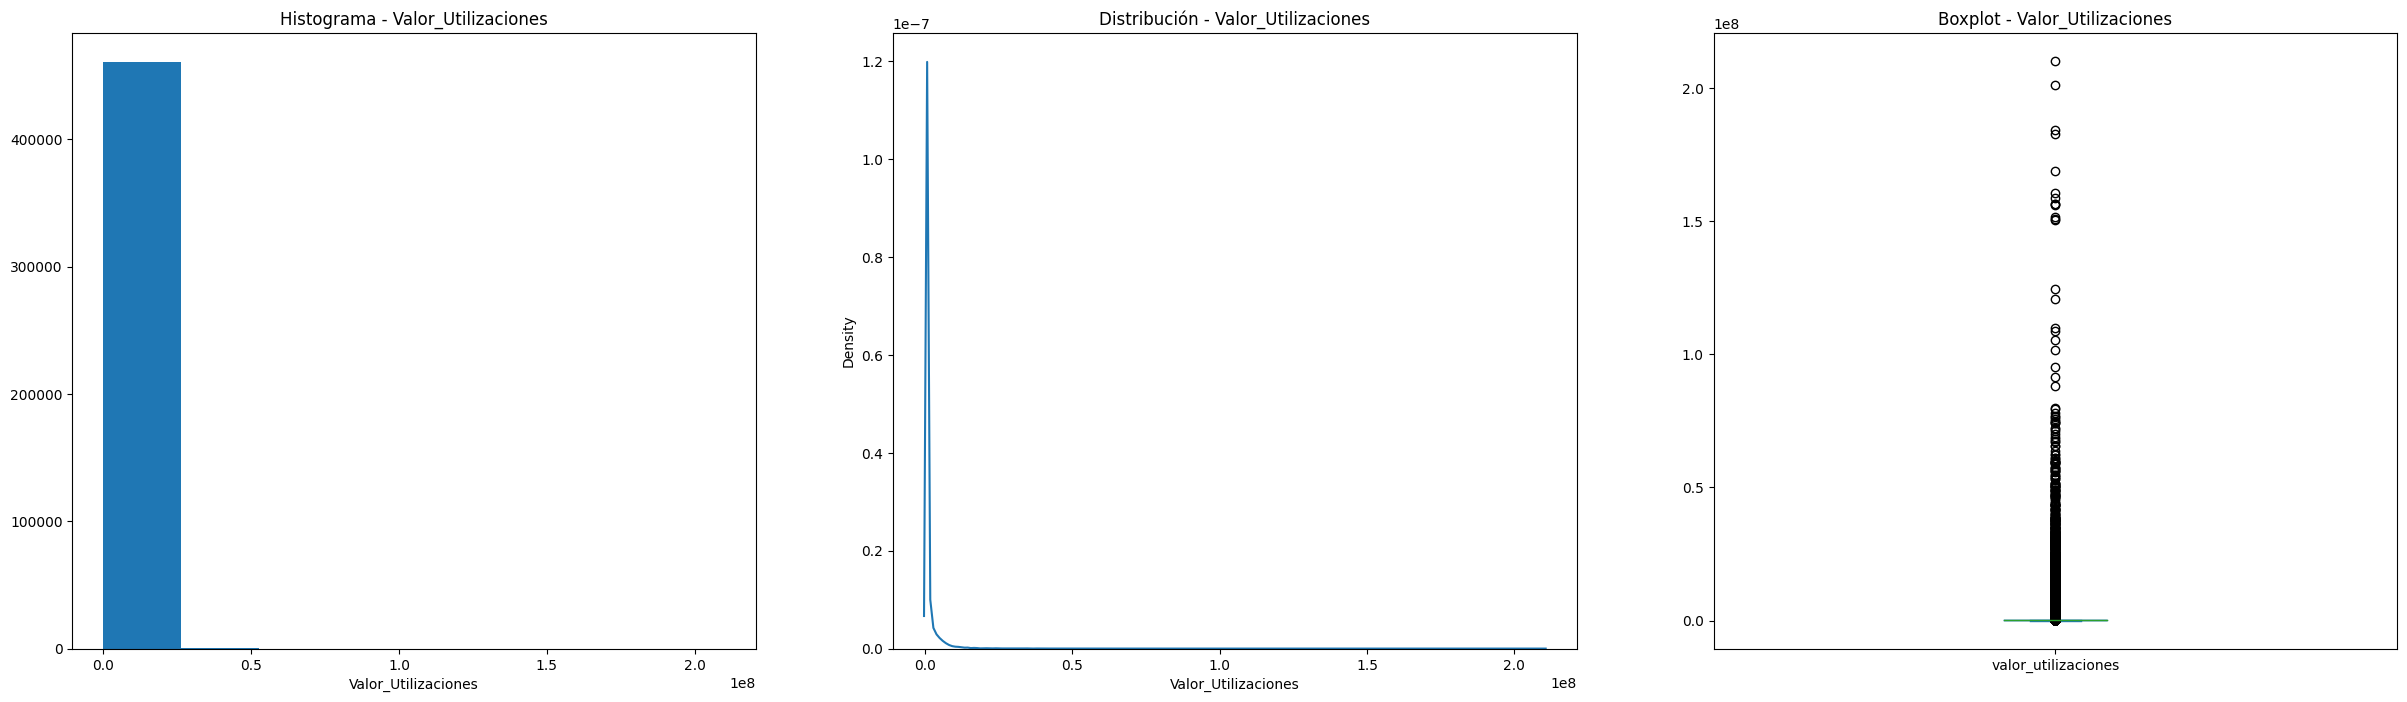

In [ ]:
#análisis de la variable target
#Valor_Utilizaciones
plt.figure(figsize=(30, 8))

plt.subplot(1,3,1)
plt.hist(dfnum.valor_utilizaciones,8)
plt.xlabel('Valor_Utilizaciones')
plt.title('Histograma - Valor_Utilizaciones')

plt.subplot(1,3,2)
sns.kdeplot(x = "valor_utilizaciones", data = dfnum)
plt.xlabel('Valor_Utilizaciones')
plt.title('Distribución - Valor_Utilizaciones')

plt.subplot(1,3,3)
dfnum['valor_utilizaciones'].plot(kind='box')
plt.title('Boxplot - Valor_Utilizaciones')
plt.show()

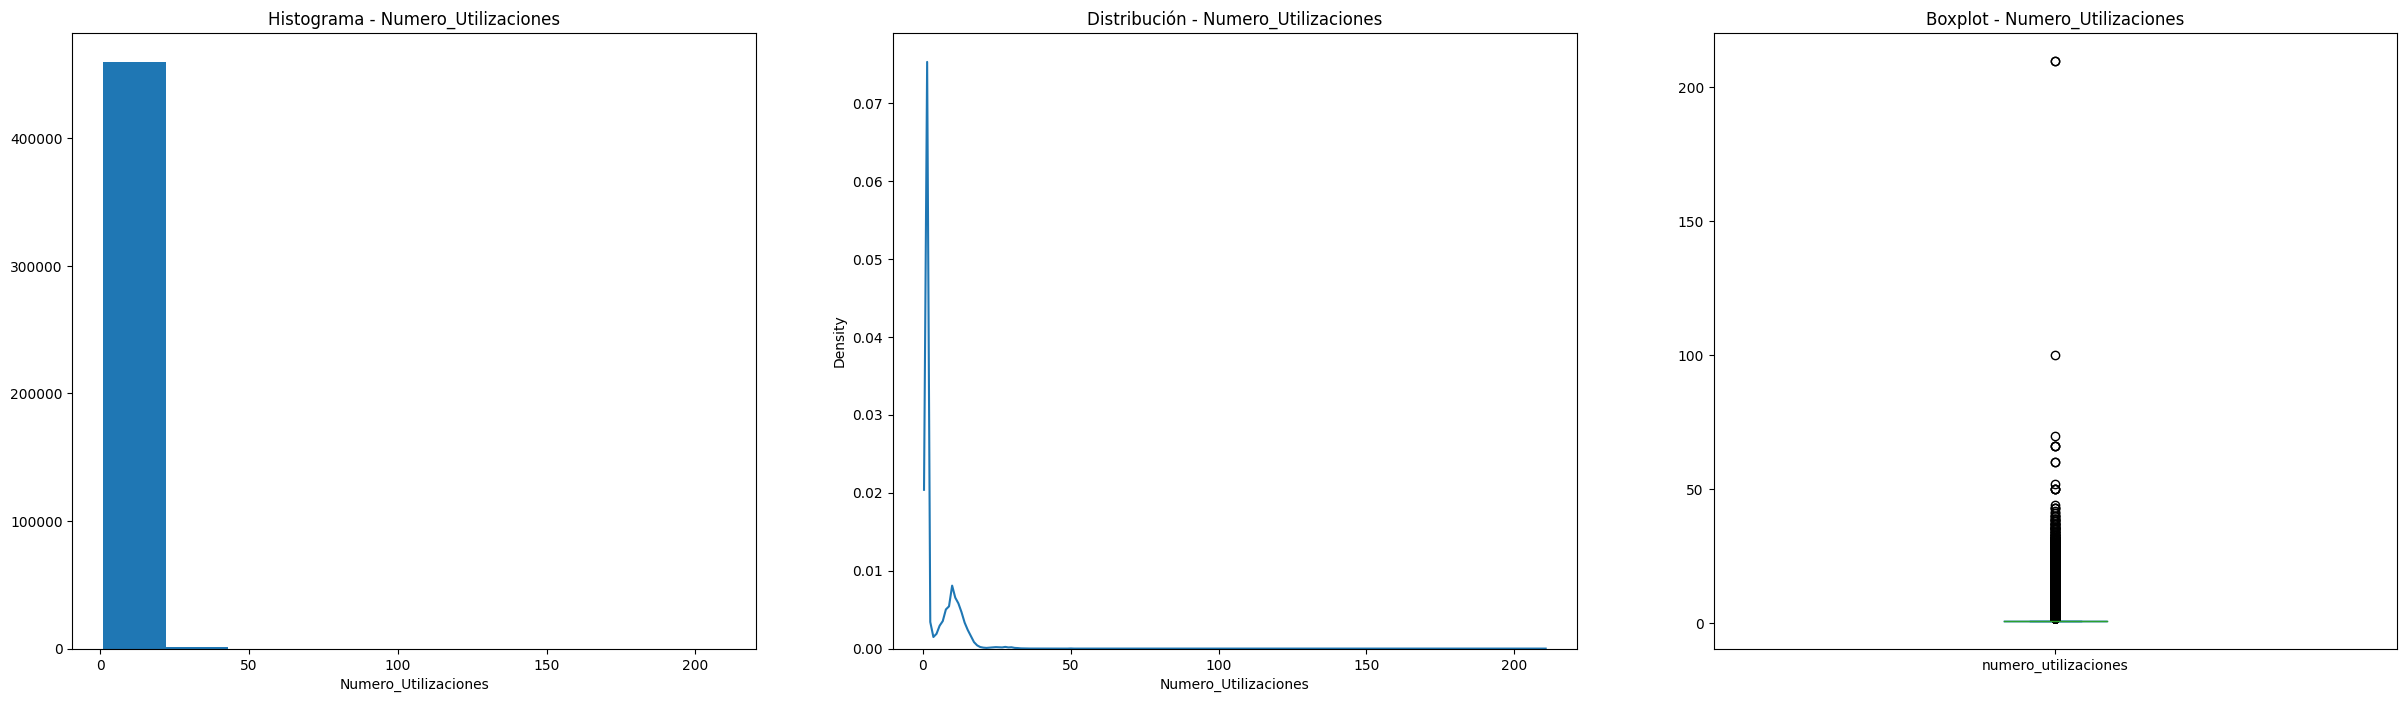

In [ ]:
#Numero_Utilizaciones
plt.figure(figsize=(30, 8))

plt.subplot(1,3,1)
plt.hist(dfnum.numero_utilizaciones,10)
plt.xlabel('Numero_Utilizaciones')
plt.title('Histograma - Numero_Utilizaciones')

plt.subplot(1,3,2)
sns.kdeplot(x = "numero_utilizaciones", data = dfnum)
plt.xlabel('Numero_Utilizaciones')
plt.title('Distribución - Numero_Utilizaciones')

plt.subplot(1,3,3)
dfnum['numero_utilizaciones'].plot(kind='box')
plt.title('Boxplot - Numero_Utilizaciones')
plt.show()

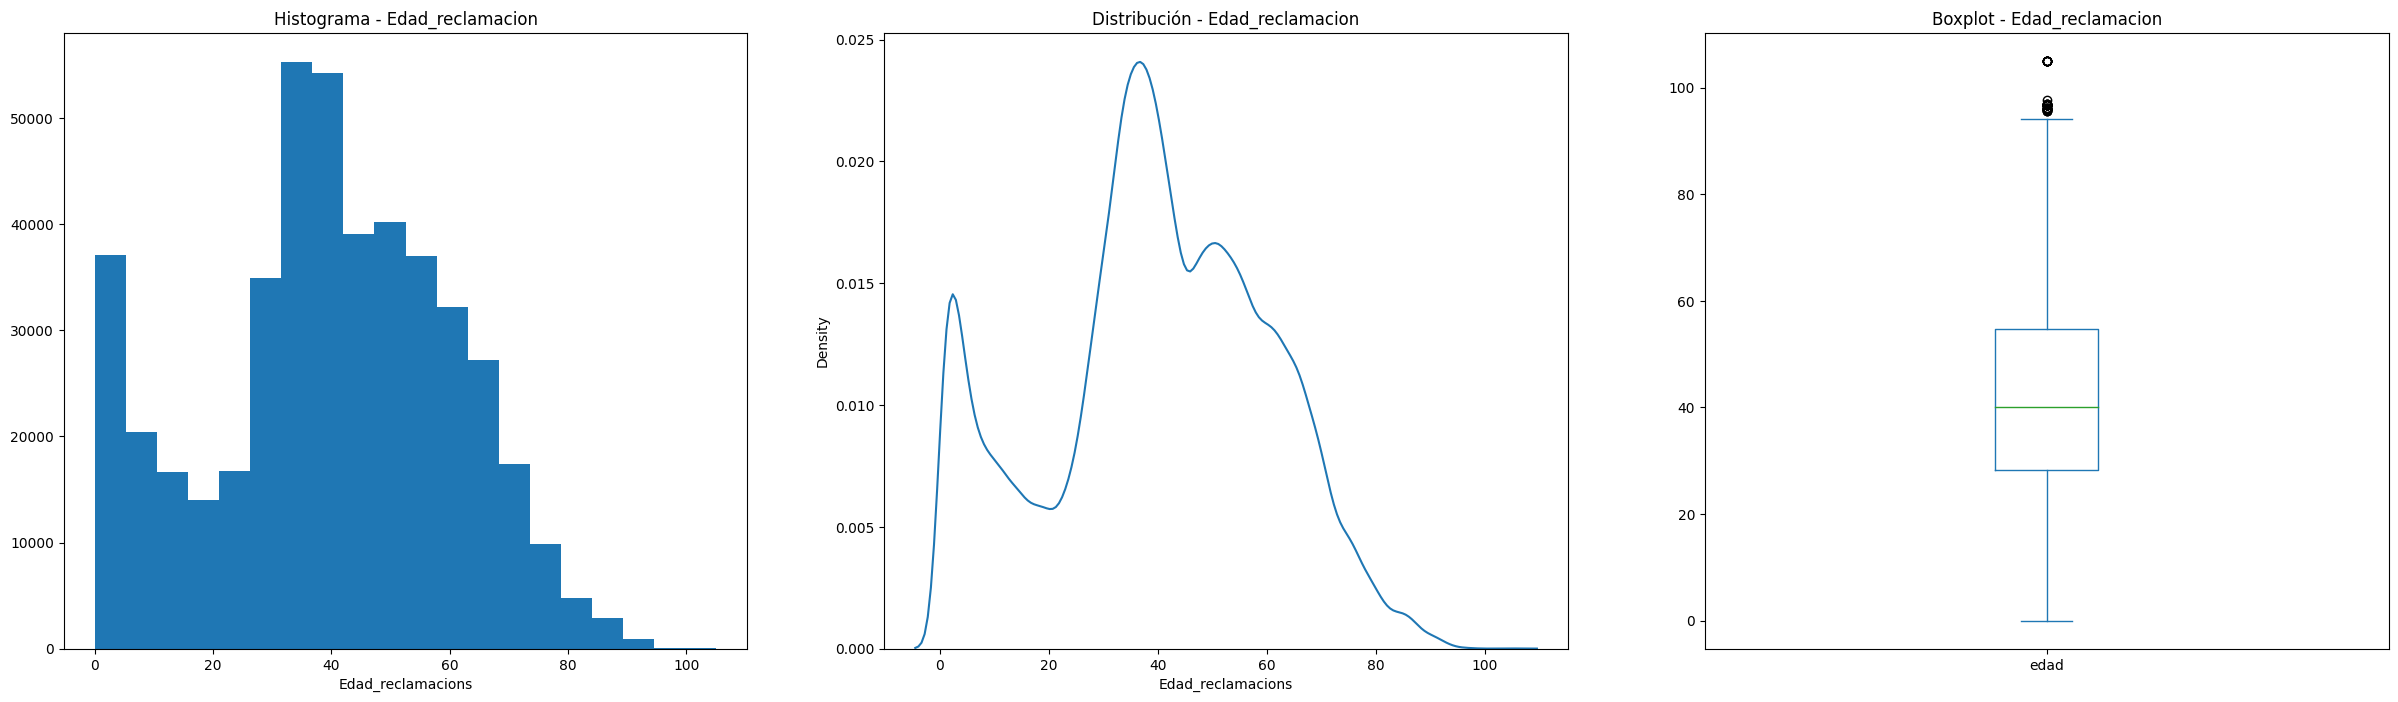

In [ ]:
# Edad_reclamación
plt.figure(figsize=(30, 8))

plt.subplot(1,3,1)
plt.hist(dfnum.edad,20)
plt.xlabel('Edad_reclamacions')
plt.title('Histograma - Edad_reclamacion')

plt.subplot(1,3,2)
sns.kdeplot(x = "edad", data = dfnum)
plt.xlabel('Edad_reclamacions')
plt.title('Distribución - Edad_reclamacion')

plt.subplot(1,3,3)
dfnum['edad'].plot(kind='box')
plt.title('Boxplot - Edad_reclamacion')
plt.show()

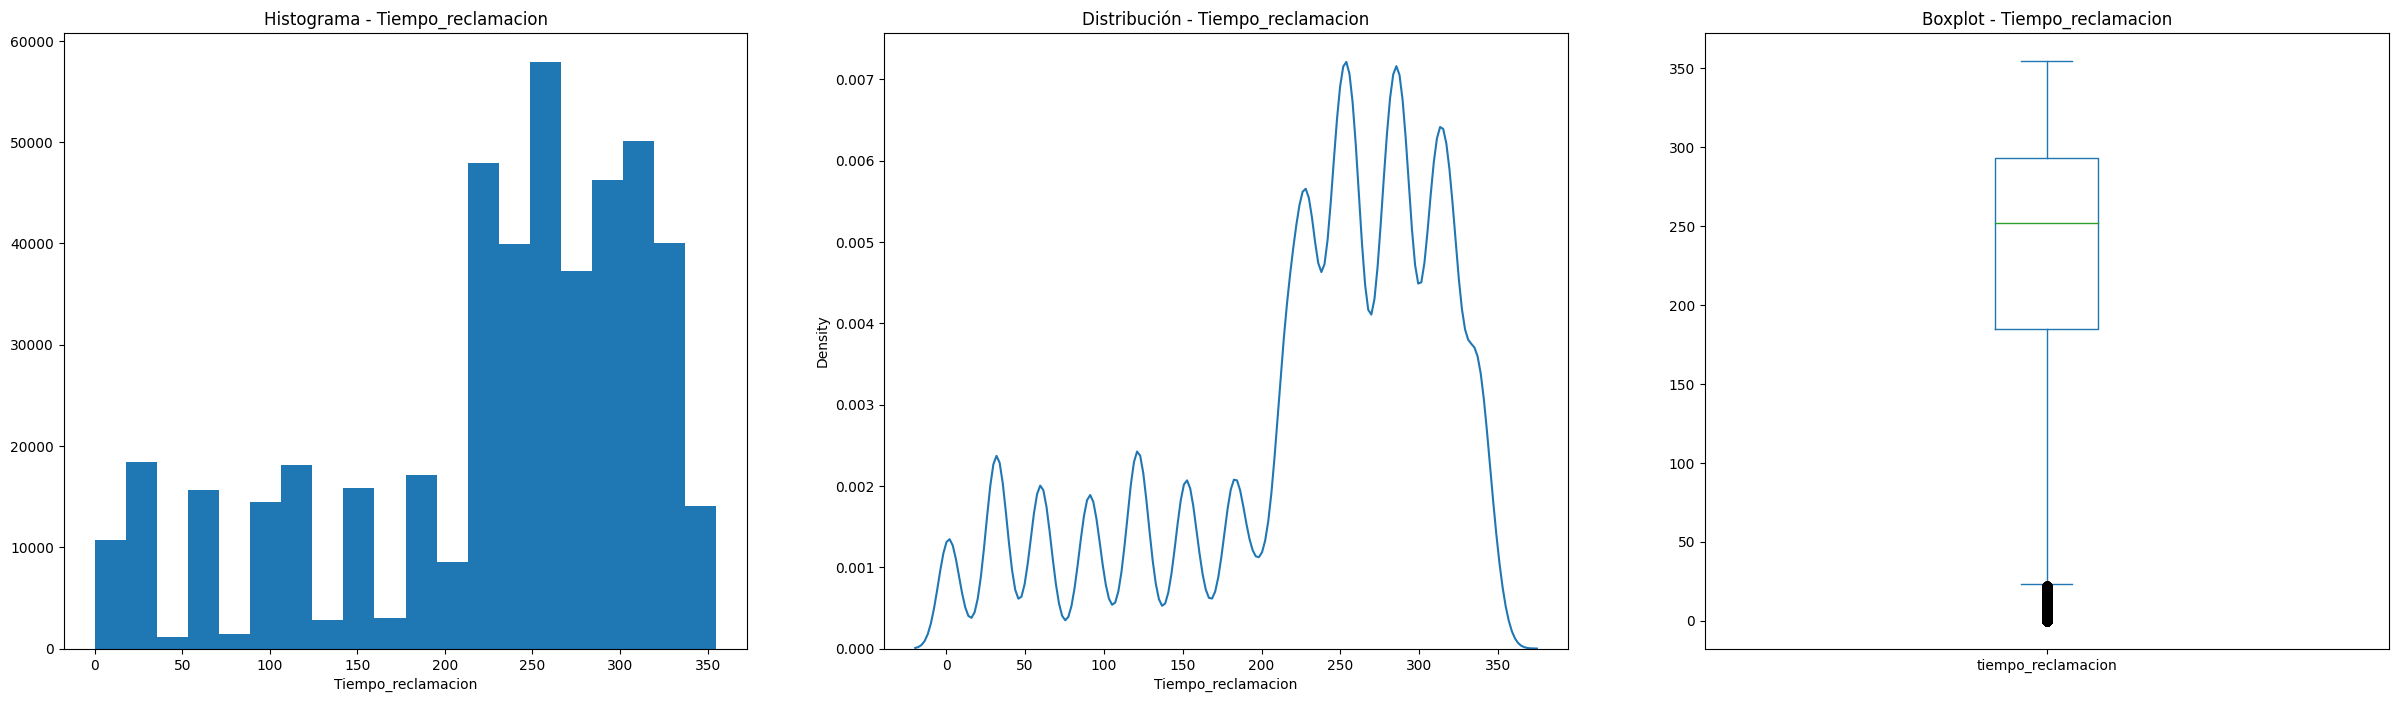

In [ ]:
# Tiempo de reclamación después de inicio de la poliza
plt.figure(figsize=(30, 8))

plt.subplot(1,3,1)
plt.hist(dfnum.tiempo_reclamacion,20)
plt.xlabel('Tiempo_reclamacion')
plt.title('Histograma - Tiempo_reclamacion')

plt.subplot(1,3,2)
sns.kdeplot(x = "tiempo_reclamacion", data = dfnum)
plt.xlabel('Tiempo_reclamacion')
plt.title('Distribución - Tiempo_reclamacion')

plt.subplot(1,3,3)
dfnum['tiempo_reclamacion'].plot(kind='box')
plt.title('Boxplot - Tiempo_reclamacion')
plt.show()

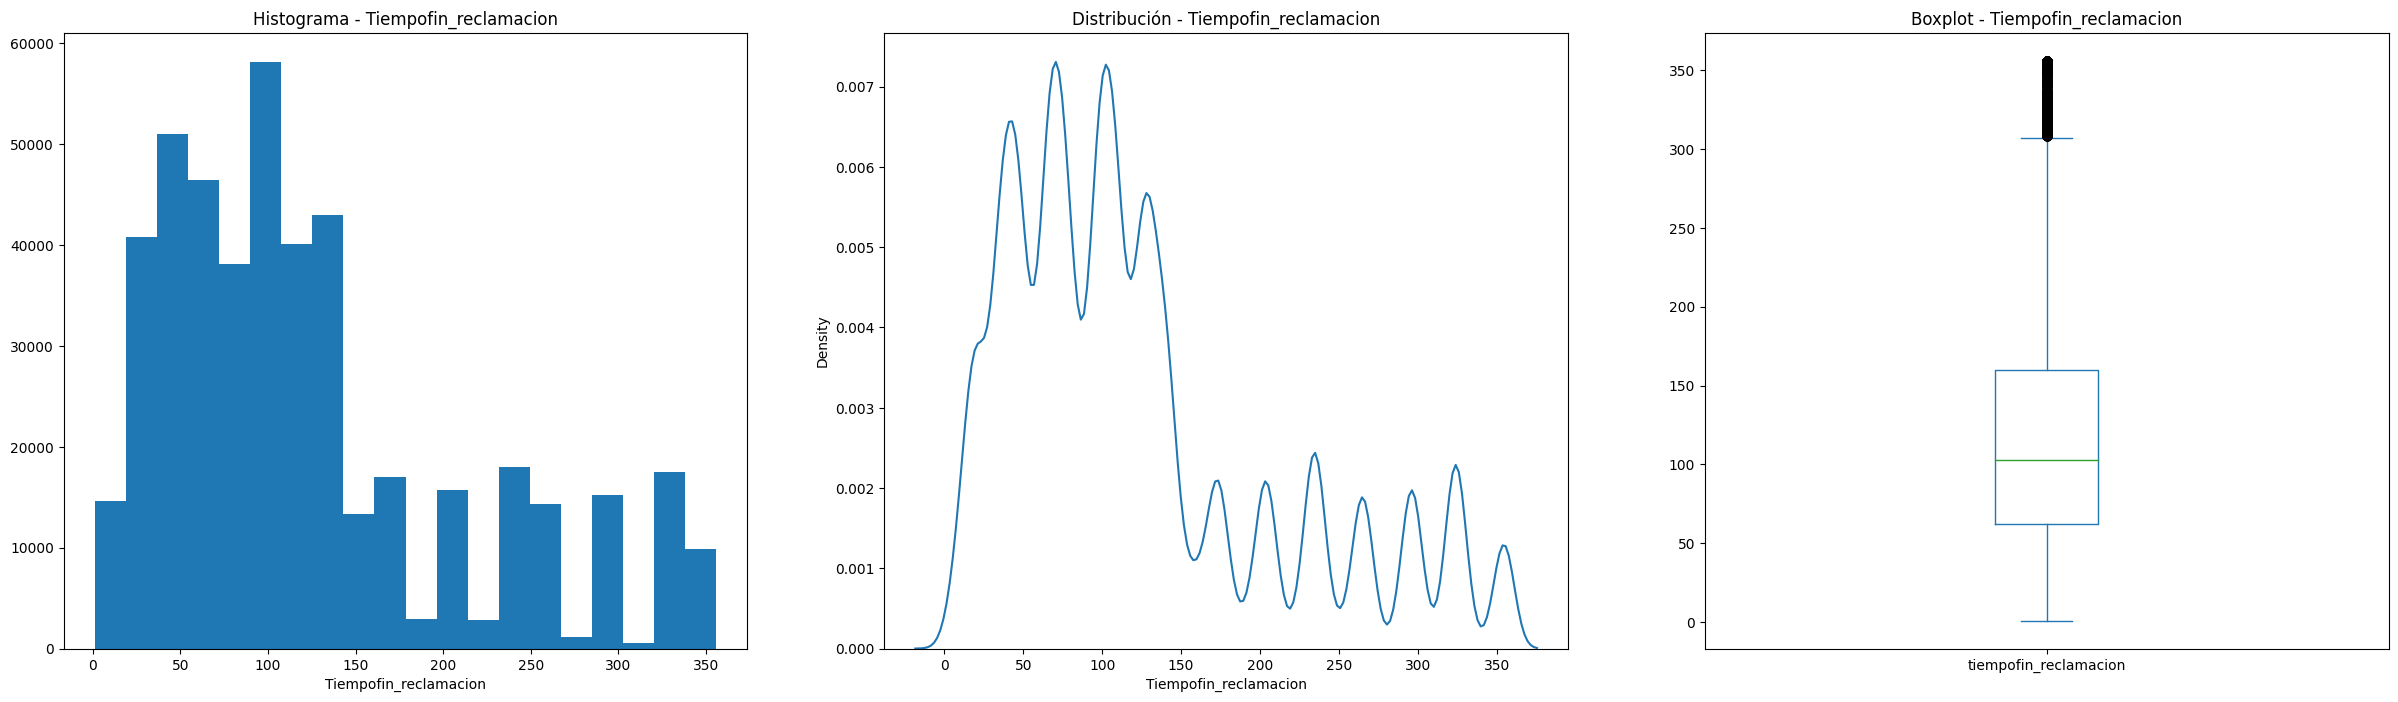

In [ ]:
# Tiempo transcurrido desde la reclamación hasta el fin de la poliza
plt.figure(figsize=(30, 8))

plt.subplot(1,3,1)
plt.hist(dfnum.tiempofin_reclamacion,20)
plt.xlabel('Tiempofin_reclamacion')
plt.title('Histograma - Tiempofin_reclamacion')

plt.subplot(1,3,2)
sns.kdeplot(x = "tiempofin_reclamacion", data = dfnum)
plt.xlabel('Tiempofin_reclamacion')
plt.title('Distribución - Tiempofin_reclamacion')

plt.subplot(1,3,3)
dfnum['tiempofin_reclamacion'].plot(kind='box')
plt.title('Boxplot - Tiempofin_reclamacion')
plt.show()

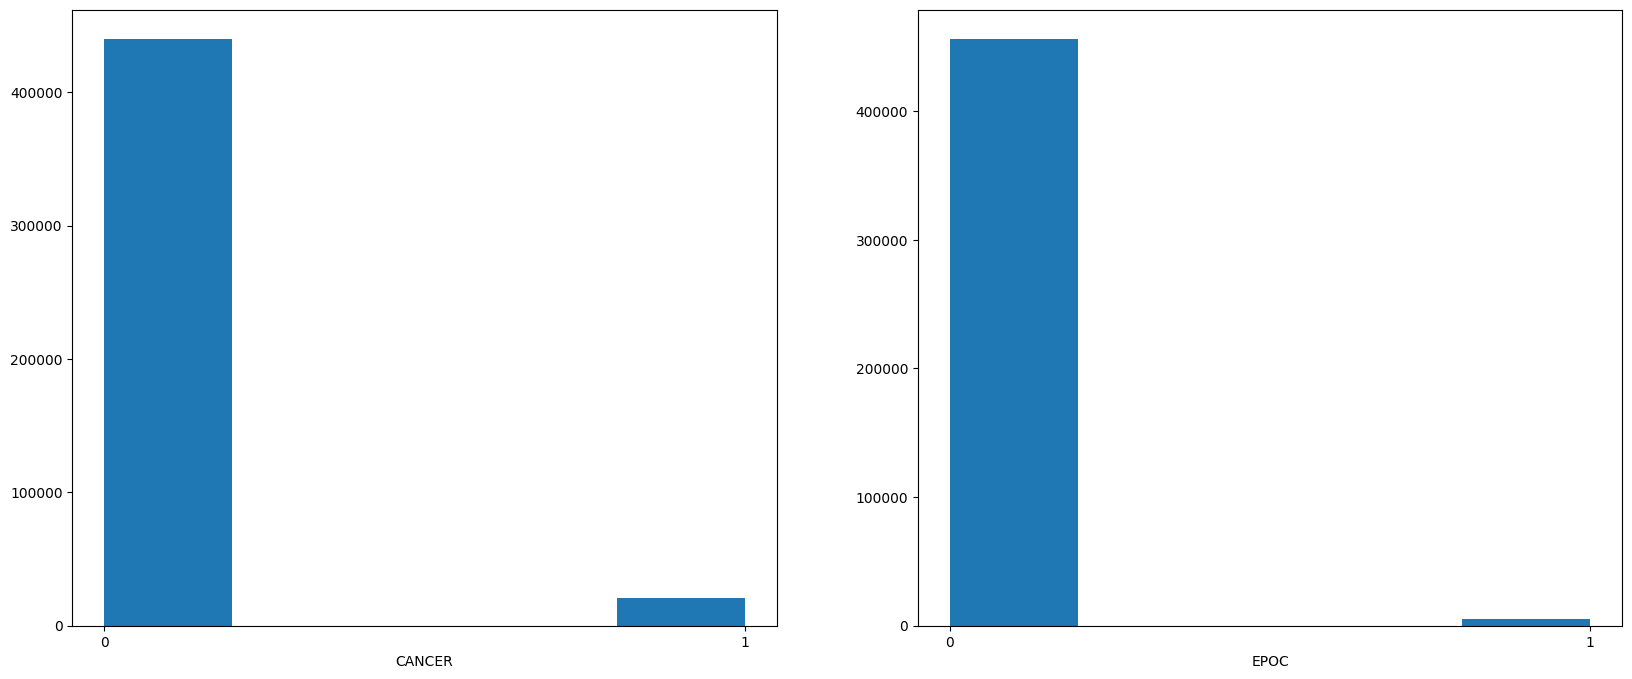

In [ ]:
# Variables numéricas categóricas
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.hist(dfcat['cancer'],5)
plt.xlabel('CANCER')

plt.subplot(1,2,2)
plt.hist(dfcat['epoc'],5)
plt.xlabel('EPOC')

plt.show()

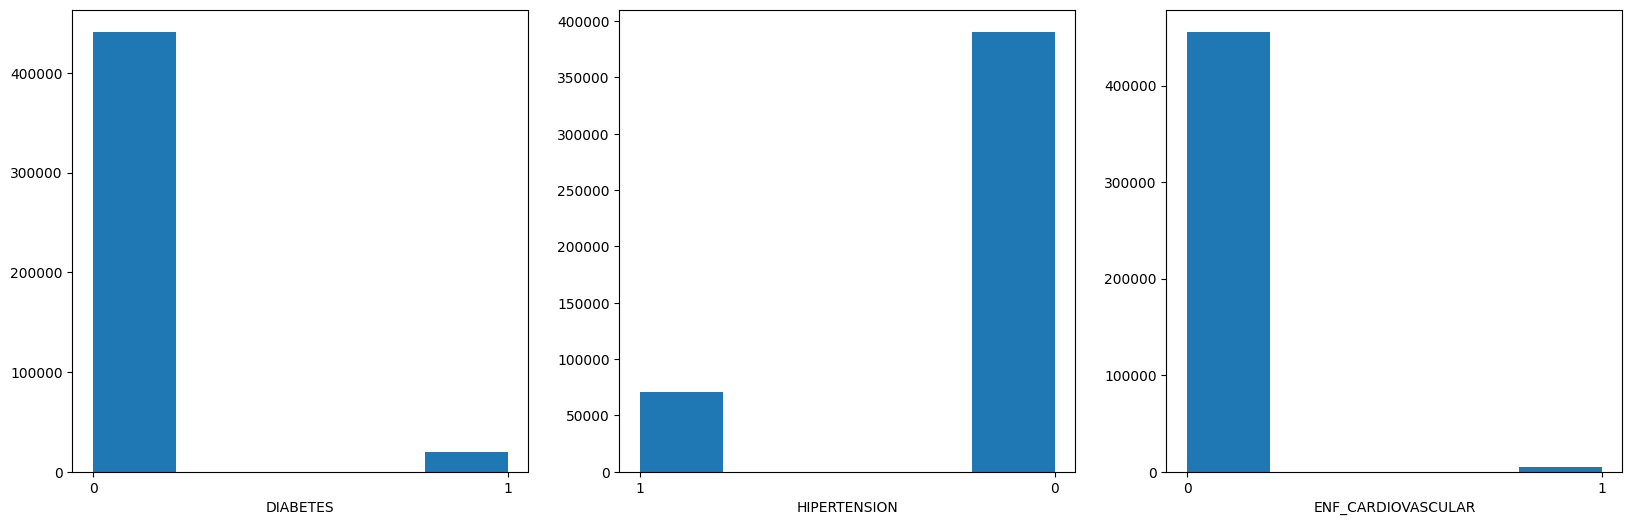

In [ ]:
# Variables numéricas categóricas
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt.hist(dfcat['diabetes'],5)
plt.xlabel('DIABETES')

plt.subplot(1,3,2)
plt.hist(dfcat['hipertension'],5)
plt.xlabel('HIPERTENSION')

plt.subplot(1,3,3)
plt.hist(dfcat['enf_cardiovascular'],5)
plt.xlabel('ENF_CARDIOVASCULAR')
plt.show()

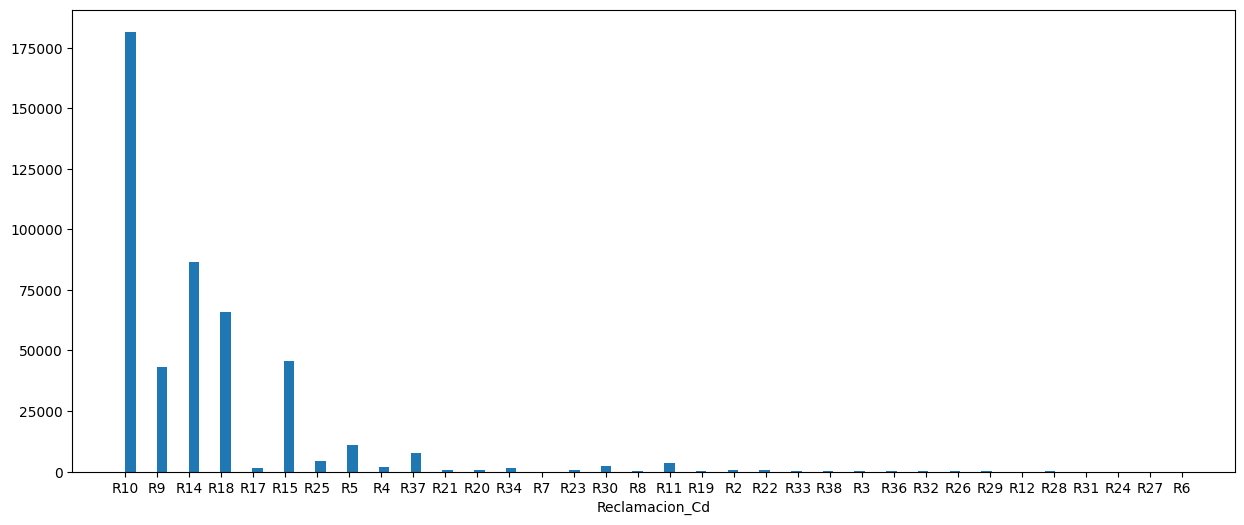

In [ ]:
# Visualización de variables categóricas
plt.figure(figsize=(15, 6))

plt.subplot(1,1,1)
plt.hist(dfcat['reclamacion_cd'],100)
plt.xlabel('Reclamacion_Cd')
plt.show()

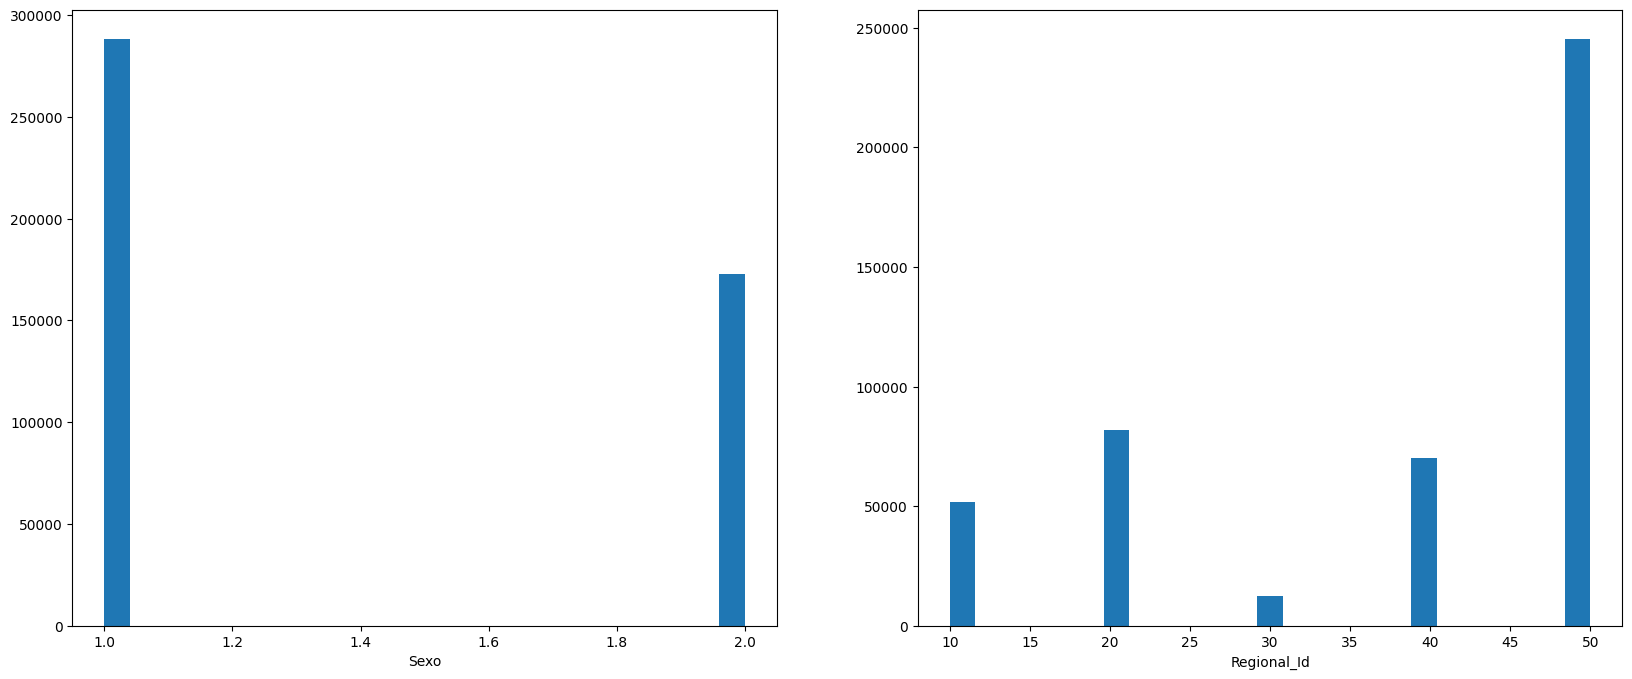

In [ ]:
# Visualización de variables categóricas
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.hist(dfnum['sexo_cd'],25)
plt.xlabel('Sexo')

plt.subplot(1,2,2)
plt.hist(dfnum['regional_id'],25)
plt.xlabel('Regional_Id')

plt.show()

In [ ]:
# Definición de función que utiliza RIC para la detección de valores atípicos
def outlier_IQR(df, column, thr):
    Q1 = np.quantile(df[column], 0.25) # primer cuartil
    Q3 = np.quantile(df[column], 0.75) # tercer cuartil
    IQR = Q3 - Q1 # inter - quartile range
    threshold = thr * IQR # defining the threshold
    lower = Q1 - threshold
    upper = Q3 + threshold
    lower_bound = df[df[column] < lower]
    upper_bound = df[df[column] > upper]

    #Imprimir IQR, threshold, lower bound, upper bound and total number of outlier
    print('IQR is:', IQR)
    print('Threshold is:', threshold)
    print('Lower bound is:', lower)
    print('Upper bound is:', upper)
    print('total number of outliers are:', lower_bound.shape[0] + upper_bound.shape[0])
    return upper, lower

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460934 entries, 4 to 823610
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   afiliado_id            460934 non-null  object 
 1   reclamacion_cd         460934 non-null  object 
 2   diagnostico_codigo     460934 non-null  object 
 3   numero_utilizaciones   460934 non-null  int64  
 4   valor_utilizaciones    460934 non-null  int64  
 5   diagnostico_desc       460934 non-null  object 
 6   reclamacion_desc       460934 non-null  object 
 7   poliza_id              460934 non-null  object 
 8   sexo_cd                460934 non-null  int64  
 9   regional_id            460934 non-null  int64  
 10  cancer                 460934 non-null  object 
 11  epoc                   460934 non-null  object 
 12  diabetes               460934 non-null  object 
 13  hipertension           460934 non-null  object 
 14  enf_cardiovascular     460934 non-nu

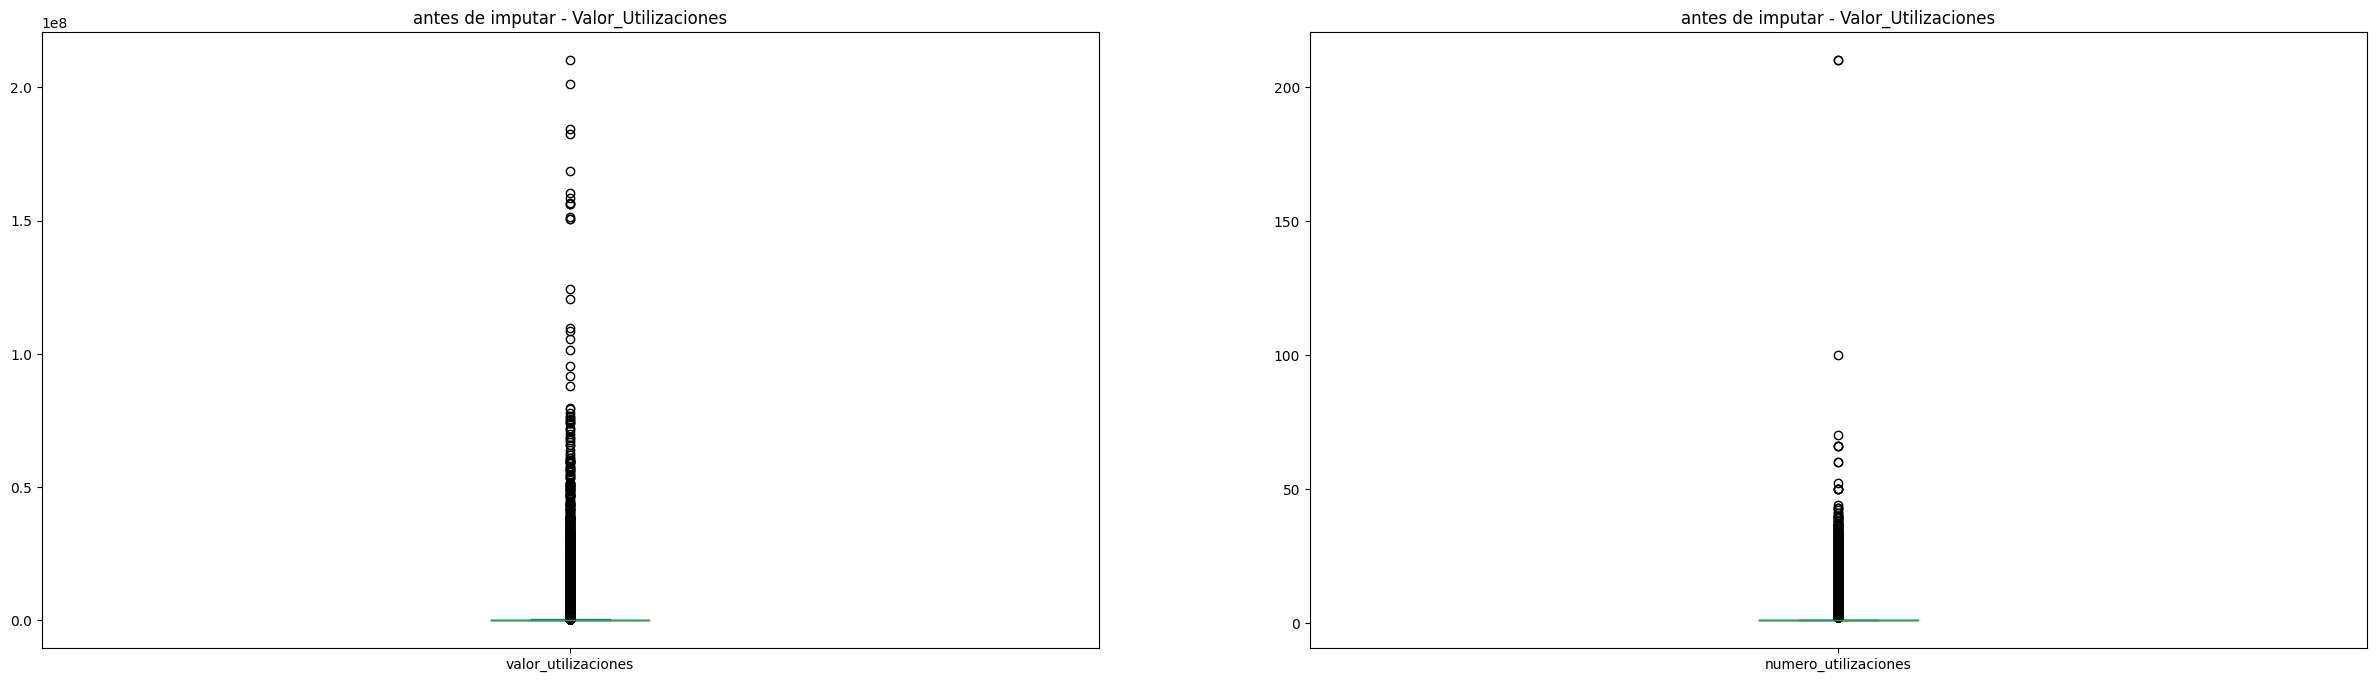

In [ ]:
#observra grafico antes de imputar
plt.figure(figsize=(30, 8))
plt.subplot(1,2,1)
dff['valor_utilizaciones'].plot(kind='box')
plt.title('antes de imputar - Valor_Utilizaciones')

plt.subplot(1,2,2)
dff['numero_utilizaciones'].plot(kind='box')
plt.title('antes de imputar - Valor_Utilizaciones')
plt.show()

In [ ]:
# Obtener el IQR, el umbral, el límite inferior, el límite superior, el total de valores atípicos extremos
c = 3
print('---------------------valor utilizaciones----------------------------')
upper_1, lower_1 = outlier_IQR(dff, 'valor_utilizaciones', c)
print('---------------------número utilizaciones----------------------------')
upper_2, lower_2 = outlier_IQR(dff, 'numero_utilizaciones', c)
print('---------------------Edad----------------------------')
upper_3, lower_3 = outlier_IQR(dff, 'edad', c)
print('---------------------tiempo de reclamación----------------------------')
upper_4, lower_4 = outlier_IQR(dff, 'tiempo_reclamacion', c)
print('---------------------tiempo de reclamación----------------------------')
upper_5, lower_5 = outlier_IQR(dff, 'tiempofin_reclamacion', c)

---------------------valor utilizaciones----------------------------
IQR is: 99978.75
Threshold is: 299936.25
Lower bound is: -244787.25
Upper bound is: 455064.0
total number of outliers are: 43692
---------------------número utilizaciones----------------------------
IQR is: 0.0
Threshold is: 0.0
Lower bound is: 1.0
Upper bound is: 1.0
total number of outliers are: 57470
---------------------Edad----------------------------
IQR is: 26.630000000000003
Threshold is: 79.89000000000001
Lower bound is: -51.710000000000015
Upper bound is: 134.70000000000002
total number of outliers are: 0
---------------------tiempo de reclamación----------------------------
IQR is: 108.0
Threshold is: 324.0
Lower bound is: -139.0
Upper bound is: 617.0
total number of outliers are: 0
---------------------tiempo de reclamación----------------------------
IQR is: 98.0
Threshold is: 294.0
Lower bound is: -232.0
Upper bound is: 454.0
total number of outliers are: 0


In [ ]:
# Imputación de valores atípicos extremos
from scipy import stats
#Impute Outliers
dff1 = dff.copy()

# Filtre los outliers y reemplace valores por el valor máximo de los registros sin incluir el valor extremo
print('Antes de imputación de Outliers:', dff.shape)

dff['valor_utilizaciones'] = np.where(dff['valor_utilizaciones'] > upper_1, stats.scoreatpercentile(dff['valor_utilizaciones'],100 - 43692/460934*100),
               np.where(dff1['valor_utilizaciones'] < lower_1, stats.scoreatpercentile(dff['valor_utilizaciones'],43692/460934*100), dff['valor_utilizaciones']))

dff['numero_utilizaciones'] = np.where(dff['numero_utilizaciones'] > upper_2, stats.scoreatpercentile(dff['numero_utilizaciones'],100 - 57470/460934*100),
               np.where(dff1['numero_utilizaciones'] < lower_2, stats.scoreatpercentile(dff['numero_utilizaciones'], 57470/460934*100), dff['numero_utilizaciones']))

print('Después de imputación de Outliers:', dff.shape)

Antes de imputación de Outliers: (460934, 18)
Después de imputación de Outliers: (460934, 18)


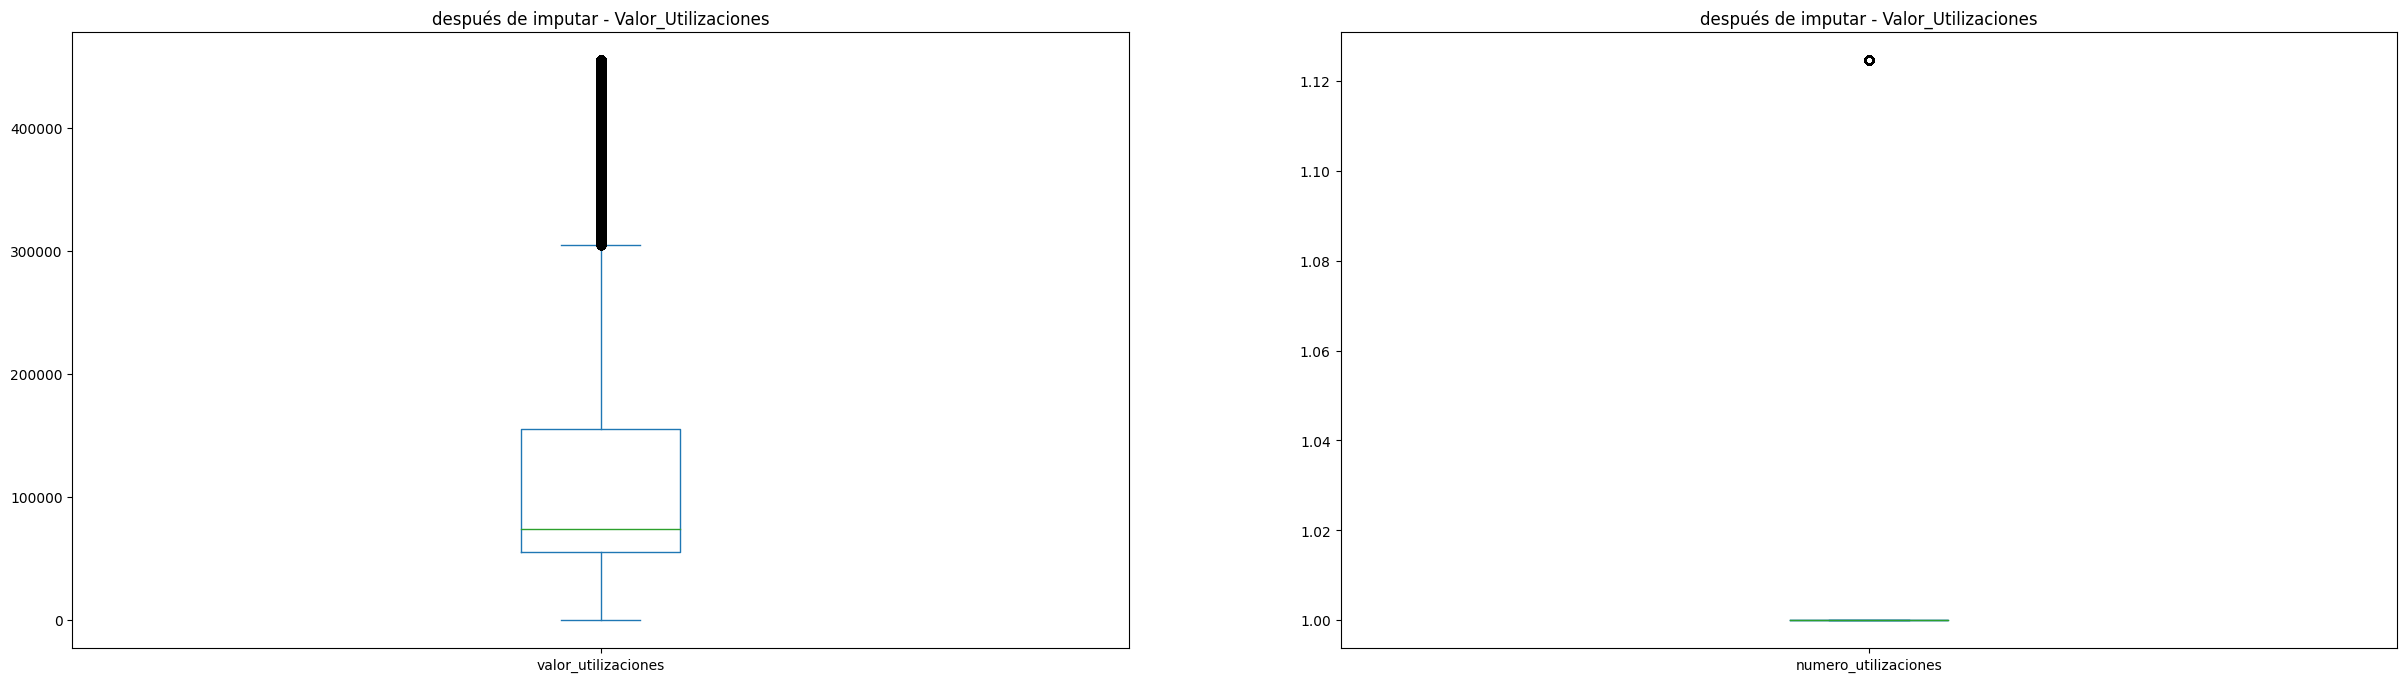

In [ ]:
#observra grafico despues de imputar
plt.figure(figsize=(30, 8))
plt.subplot(1,2,1)
dff['valor_utilizaciones'].plot(kind='box')
plt.title('después de imputar - Valor_Utilizaciones')

plt.subplot(1,2,2)
dff['numero_utilizaciones'].plot(kind='box')
plt.title('después de imputar - Valor_Utilizaciones')
plt.show()

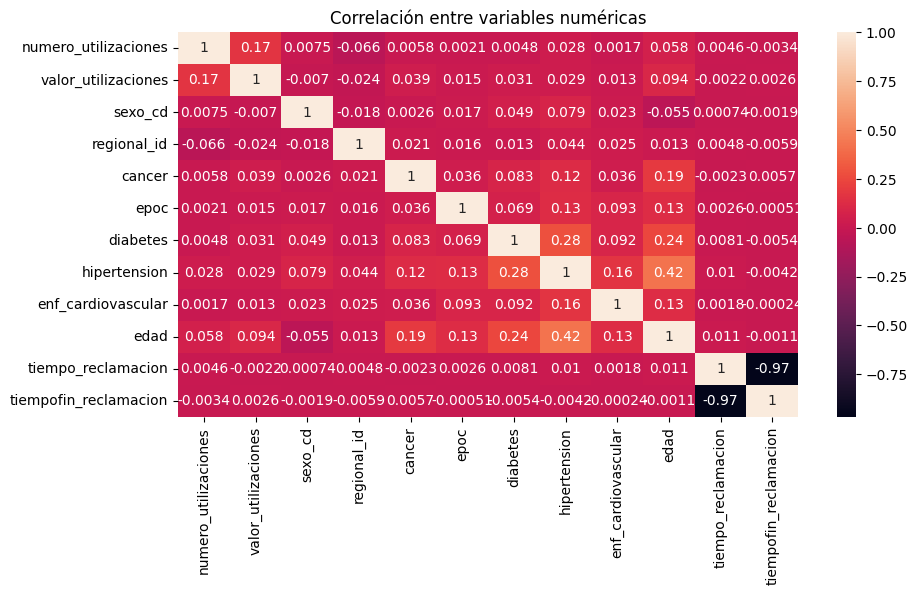

In [ ]:
# Análisis de colinealidad - Correlación entre variables numéricas
# Obtener matriz de correlación (coeficiente de correlación de pearson) para las variables numéricas
dff['cancer'] = dff['cancer'].astype(int)
dff['epoc'] = dff['epoc'].astype(int)
dff['diabetes'] = dff['diabetes'].astype(int)
dff['hipertension'] = dff['hipertension'].astype(int)
dff['enf_cardiovascular'] = dff['enf_cardiovascular'].astype(int)

dfnum1 = dff.select_dtypes(include=['float64','int64'])

corr_df = dfnum1.corr(method='pearson')

plt.figure(figsize=(10, 5))
sns.heatmap(corr_df, annot=True)
plt.title("Correlación entre variables numéricas")
plt.show()

In [ ]:
#miramos el dataset
dff

,afiliado_id,reclamacion_cd,diagnostico_codigo,numero_utilizaciones,valor_utilizaciones,diagnostico_desc,reclamacion_desc,poliza_id,sexo_cd,regional_id,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,tiempo_reclamacion,tiempofin_reclamacion
4,16076764,R10,9,1.0,111352.000000,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,83438289,2,40,0,0,0,1,0,38.35,181.0,175.0
5,16076764,R10,9,1.0,55676.000000,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,83438289,2,40,0,0,0,1,0,38.35,244.0,112.0
6,16076764,R9,9,1.0,96100.000000,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS,83438289,2,40,0,0,0,1,0,38.35,153.0,203.0
7,12245582,R10,9,1.0,56916.000000,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,168122413,2,10,0,0,0,0,0,43.94,123.0,233.0
8,12245582,R10,9,1.0,56916.000000,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,168122413,2,10,0,0,0,0,0,43.94,295.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823591,4465354,R36,B230,1.0,455061.042692,SÍNDROME DE INFECCIÓN AGUDA DEBIDA A VIH,TRATAMIENTOS AMBULATORIOS ESPECIALES,95547342,2,20,0,0,0,0,0,59.19,329.0,27.0
823598,23740056,R3,F331,1.0,455061.042692,"TRASTORNO DEPRESIVO RECURRENTE, EPISODIO MODER...",ATENCION INTEGRAL DE SALUD MENTAL,93259727,1,50,0,0,0,1,0,66.13,260.0,96.0
823599,33892589,R3,F418,1.0,455061.042692,OTROS TRASTORNOS DE ANSIEDAD ESPECIFICADOS,ATENCION INTEGRAL DE SALUD MENTAL,89613365,2,50,0,0,0,0,0,9.56,244.0,112.0
823600,24022609,R27,S099,1.0,455061.042692,"TRAUMATISMO DE LA CABEZA, NO ESPECIFICADO",TRATAMIENTO MEDICO HOSPITALARIO POR ACCIDENTE,95666478,1,30,0,0,0,0,0,66.92,243.0,113.0


In [ ]:
#miramos información genral de dataset
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460934 entries, 4 to 823610
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   afiliado_id            460934 non-null  object 
 1   reclamacion_cd         460934 non-null  object 
 2   diagnostico_codigo     460934 non-null  object 
 3   numero_utilizaciones   460934 non-null  float64
 4   valor_utilizaciones    460934 non-null  float64
 5   diagnostico_desc       460934 non-null  object 
 6   reclamacion_desc       460934 non-null  object 
 7   poliza_id              460934 non-null  object 
 8   sexo_cd                460934 non-null  int64  
 9   regional_id            460934 non-null  int64  
 10  cancer                 460934 non-null  int64  
 11  epoc                   460934 non-null  int64  
 12  diabetes               460934 non-null  int64  
 13  hipertension           460934 non-null  int64  
 14  enf_cardiovascular     460934 non-nu

## **Selección de variables y algoritmos**

In [ ]:
# Copiamos el datast
dffs = dff.copy()

In [ ]:
# Variable objetivo
cost_ut = dffs['valor_utilizaciones']

In [ ]:
#eliminar la variable objetivo para volver dummies las variables
dffs.drop('valor_utilizaciones', axis=1, inplace =True)

#eliminar variables que son tipo identificadores
dffs.drop("afiliado_id", axis = 1, inplace = True)
dffs.drop("diagnostico_desc", axis = 1, inplace = True)
dffs.drop("reclamacion_desc", axis = 1, inplace = True)
dffs.drop("poliza_id", axis = 1, inplace = True)
dffs.drop("tiempofin_reclamacion", axis = 1, inplace = True) #Debido a la correlación con el tiempo de reclamación


#eliminar variable diagnostico por tenerr muchas categorias puede ser dificl de procesar e interpretar
dffs.drop("diagnostico_codigo", axis = 1, inplace = True)
dffs.drop("reclamacion_cd", axis=1, inplace=True)

#convertir variables a tipo dummmies
#dffs =pd.get_dummies(dffs)
dffs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460934 entries, 4 to 823610
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   numero_utilizaciones  460934 non-null  float64
 1   sexo_cd               460934 non-null  int64  
 2   regional_id           460934 non-null  int64  
 3   cancer                460934 non-null  int64  
 4   epoc                  460934 non-null  int64  
 5   diabetes              460934 non-null  int64  
 6   hipertension          460934 non-null  int64  
 7   enf_cardiovascular    460934 non-null  int64  
 8   edad                  460934 non-null  float64
 9   tiempo_reclamacion    460934 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 38.7 MB


In [ ]:
#se anexa la variable objetivo
df_real =pd.concat([cost_ut,dffs], axis=1)
df_real.valor_utilizaciones = df_real['valor_utilizaciones'].astype(float)
df_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460934 entries, 4 to 823610
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   valor_utilizaciones   460934 non-null  float64
 1   numero_utilizaciones  460934 non-null  float64
 2   sexo_cd               460934 non-null  int64  
 3   regional_id           460934 non-null  int64  
 4   cancer                460934 non-null  int64  
 5   epoc                  460934 non-null  int64  
 6   diabetes              460934 non-null  int64  
 7   hipertension          460934 non-null  int64  
 8   enf_cardiovascular    460934 non-null  int64  
 9   edad                  460934 non-null  float64
 10  tiempo_reclamacion    460934 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 42.2 MB


In [ ]:
# Separacion de variables
y = df_real.valor_utilizaciones
X = df_real.drop(["valor_utilizaciones"], axis = 1)

# Separación de caracteristicas númericas y categóricas
numeric_columns=list(X.select_dtypes(include=['int', 'float']).columns)

# Estandarización de variables númericas para evitar sesgos debido a escalas
pipeline=ColumnTransformer([('num',StandardScaler(),numeric_columns)], remainder='passthrough')
X1 = pipeline.fit_transform(X)
Xe = pd.DataFrame(X1, index = X.index, columns=X.columns)

### **Modelos sin selección de variables**

**Regresión lineal**

In [ ]:
# Separación en conjuntos de entrenamiento y validación con 70% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(Xe, y, test_size=0.3, random_state=60)

In [ ]:
#crear modelo de regresión lineal
rl = LinearRegression()

#calibración de modelo
rl.fit(X_train, y_train)

#predicciones sobre datos de entrenamiento
y_pred = rl.predict(X_train)

#metricas de desempeño
print ("Train - MAE :", round(metrics.mean_absolute_error(y_train, rl.predict(X_train)),3))
print ("Train - MSE :", round(metrics.mean_squared_error(y_train, rl.predict(X_train)),3))
print ("Train - RMSE :", round(metrics.mean_squared_error(y_train, rl.predict(X_train), squared=False),3))
print ("Train - MAPE :", round(metrics.mean_absolute_percentage_error(y_train, rl.predict(X_train)),6)*100,"%")
print ("Train - R^2 :", round(metrics.r2_score(y_train, rl.predict(X_train)),3))
print('-----------------------------------------------------------------------')
print ("Test - MAE :", round(metrics.mean_absolute_error(y_test, rl.predict(X_test)),3))
print ("Test - MSE :", round(metrics.mean_squared_error(y_test, rl.predict(X_test)),3))
print ("Test - RMSE :", round(metrics.mean_squared_error(y_test, rl.predict(X_test), squared = False),3))
print ("Test - MAPE :", round(metrics.mean_absolute_percentage_error(y_test, rl.predict(X_test)),6)*100,"%")
print ("Test - R^2 :", round(metrics.r2_score(y_test, rl.predict(X_test)),3))

Train - MAE : 99144.874
Train - MSE : 17208279978.045
Train - RMSE : 131180.334
Train - MAPE : 178.377 %
Train - R^2 : 0.036
-----------------------------------------------------------------------
Test - MAE : 98764.27
Test - MSE : 17092655160.401
Test - RMSE : 130738.882
Test - MAPE : 172.5624 %
Test - R^2 : 0.037


**Árbol de desición**

In [ ]:
# Creación del arbol
clf0 = tree.DecisionTreeRegressor(random_state=60,
                                  criterion='absolute_error',
                                  max_depth = 20,
                                  min_samples_leaf = 20,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 100)

clf0.fit(X_train, y_train)

# Métricas de desempeño
print ("Train - MAE :", round(metrics.mean_absolute_error(y_train, clf0.predict(X_train)),3))
print ("Train - MSE :", round(metrics.mean_squared_error(y_train, clf0.predict(X_train)),3))
print ("Train - RMSE :", round(metrics.mean_squared_error(y_train, clf0.predict(X_train), squared=False),3))
print ("Train - MAPE :", round(metrics.mean_absolute_percentage_error(y_train, clf0.predict(X_train)),6)*100,"%")
print ("Train - R^2 :", round(metrics.r2_score(y_train, clf0.predict(X_train)),3))
print('-----------------------------------------------------------------------')
print ("Test - MAE :", round(metrics.mean_absolute_error(y_test, clf0.predict(X_test)),3))
print ("Test - MSE :", round(metrics.mean_squared_error(y_test, clf0.predict(X_test)),3))
print ("Test - RMSE :", round(metrics.mean_squared_error(y_test, clf0.predict(X_test), squared = False),3))
print ("Test - MAPE :", round(metrics.mean_absolute_percentage_error(y_test, clf0.predict(X_test)),6)*100,"%")
print ("Test - R^2 :", round(metrics.r2_score(y_test, clf0.predict(X_test)),3))

Train - MAE : 84959.696
Train - MSE : 20293392198.013
Train - RMSE : 142454.878
Train - MAPE : 92.946 %
Train - R^2 : -0.137
-----------------------------------------------------------------------
Test - MAE : 84590.269
Test - MSE : 20165565999.309
Test - RMSE : 142005.514
Test - MAPE : 89.63799999999999 %
Test - R^2 : -0.136


**Bosque aleatorio**

In [ ]:
# Creacion del bosque
ranfor0 = RandomForestRegressor(n_estimators = 5,
                               random_state=60,
                               min_samples_leaf = 20,
                               max_leaf_nodes = 100,
                               max_features = 'sqrt',
                               max_depth = 20,
                               criterion = 'absolute_error')

ranfor0.fit(X_train, y_train)

# Métricas de desempeño
print ("Train - MAE :", round(metrics.mean_absolute_error(y_train, ranfor0.predict(X_train)),3))
print ("Train - MSE :", round(metrics.mean_squared_error(y_train, ranfor0.predict(X_train)),3))
print ("Train - RMSE :", round(metrics.mean_squared_error(y_train, ranfor0.predict(X_train), squared = False),3))
print ("Train - MAPE :", round(metrics.mean_absolute_percentage_error(y_train, ranfor0.predict(X_train)),6)*100,"%")
print ("Train - R^2 :", round(metrics.r2_score(y_train, ranfor0.predict(X_train)),3))
print('-----------------------------------------------------------------------')
print ("Test - MAE :", round(metrics.mean_absolute_error(y_test, ranfor0.predict(X_test)),3))
print ("Test - MSE :", round(metrics.mean_squared_error(y_test, ranfor0.predict(X_test)),3))
print ("Test - RMSE :", round(metrics.mean_squared_error(y_test, ranfor0.predict(X_test), squared = False),3))
print ("Test - MAPE :", round(metrics.mean_absolute_percentage_error(y_test, ranfor0.predict(X_test)),6)*100,"%")
print ("Test - R^2 :", round(metrics.r2_score(y_test, ranfor0.predict(X_test)),3))

Train - MAE : 84967.559
Train - MSE : 20153113378.112
Train - RMSE : 141961.662
Train - MAPE : 94.1047 %
Train - R^2 : -0.129
-----------------------------------------------------------------------
Test - MAE : 84540.954
Test - MSE : 20019061962.3
Test - RMSE : 141488.734
Test - MAPE : 90.9312 %
Test - R^2 : -0.128


**OBSERVACIONES**

Se observa que el desempeño computacional del árbol de decisión y el bosque aleatorio es alto, ya que los resultados se obtienen en aproximadamente 30 minutos.

De manera adicional, se observa que los modelos presentan un porcentaje de error superior al 89%, lo cual puede asociarse a los valores de utilización atípicos identificados desde el análisis exploratorio. No obstante, se identifica que el promedio de error en la regresión lineal es 99.144,874 en entrenamiento y 98.764,27 en la validación, en el árbol de decisión los resultados son de 83.323,317 y 83.471,474 para entrenamiento y validación respectivamente, por último, en el bosque aleatorio, se obtienen promedios de error de 83.503,211 en entrenamiento y 83.621,176 en validación.

Teniendo en cuenta lo anterior, se selecciona la regresión lineal como modelo de implementación para el desarrollo del tarifario, debido a que tiene un desempeño computacional superior y unas métricas no muy lejanas a las de los demás modelos.

No obstante, se realiza una validación cruzada de la regresión lineal para visualizar el desempeño real del modelo inicialmente construido.


**Validación cruzada regresión lineal**

In [ ]:
# Función de realizar validación cruzada
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      _scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)

      return {"Training MAE scores": results['train_neg_mean_absolute_error'],
              "Mean Training MAE": results['train_neg_mean_absolute_error'].mean(),
              "Training MSE scores": results['train_neg_mean_squared_error'],
              "Mean Training MSE": results['train_neg_mean_squared_error'].mean(),
              "Training RMSE scores": results['train_neg_root_mean_squared_error'],
              "Mean Training RMSE": results['train_neg_root_mean_squared_error'].mean(),
              "Training MAPE scores": results['train_neg_mean_absolute_percentage_error'],
              "Mean Training MAPE": results['train_neg_mean_absolute_percentage_error'].mean()*100,
              "Validation MAE scores": results['test_neg_mean_absolute_error'],
              "Mean Validation MAE": results['test_neg_mean_absolute_error'].mean(),
              "Validation MSE scores": results['test_neg_mean_squared_error'],
              "Mean Validation MSE": results['test_neg_mean_squared_error'].mean(),
              "Validation RMSE scores": results['test_neg_root_mean_squared_error'],
              "Mean Validation RMSE": results['test_neg_root_mean_squared_error'].mean(),
              "Validation MAPE scores": results['test_neg_mean_absolute_percentage_error'],
              "Mean Validation MAPE": results['test_neg_mean_absolute_percentage_error'].mean()*100
              }

In [ ]:
# Evaluación de la regresión lineal
cv = 100
model_rl = cross_validation(rl, Xe, y, cv)
print("Mean Training MAE Regresión lineal 0: ", -1*round(model_rl['Mean Training MAE'],4),
      "\nMean Validation MAE Regresión lineal 0: ", -1*round(model_rl['Mean Validation MAE'],4),
      "\nMean Training MSE Regresión lineal 0: ", -1*round(model_rl['Mean Training MSE'],4),
      "\nMean Validation MSE Regresión lineal 0: ",-1*round(model_rl['Mean Validation MSE'],4),
      "\nMean Training RMSE Regresión lineal 0: ", -1*round(model_rl['Mean Training RMSE'],4),
      "\nMean Validation RMSE Regresión lineal 0: ", -1*round(model_rl['Mean Validation RMSE'],4),
      "\nMean Training MAPE Regresión lineal 0: ", -1*round(model_rl['Mean Training MAPE'],4), "%"
      "\nMean Validation MAPE Regresión lineal 0: ", -1*round(model_rl['Mean Validation MAPE'],4), "%")

Mean Training MAE Regresión lineal 0:  98949.2315 
Mean Validation MAE Regresión lineal 0:  98974.7997 
Mean Training MSE Regresión lineal 0:  17173389877.383 
Mean Validation MSE Regresión lineal 0:  17181528423.7906 
Mean Training RMSE Regresión lineal 0:  131047.2486 
Mean Validation RMSE Regresión lineal 0:  130834.3969 
Mean Training MAPE Regresión lineal 0:  176.3236 %
Mean Validation MAPE Regresión lineal 0:  176.3709 %


Se observa que después de hacer una validación con 100 iteraciones, el promedio de error que se tiene en el modelo construido es de 98.949,2315 en entrenamiento y 98.974,7997 en validación.

No obstante, en el modelo construido inicialmente se usan variables que pueden ser desconocidas en el momento que se vende el seguro, por lo cual, no es ideal usarlas para la construcción del tarifario.

### **Modelo regresión lineal con selección de variables manual**

**Selección de variables a criterio de las analistas**

In [ ]:
# Volvemos a traer el dataframe real
df_manual = df_real

In [ ]:
# Eliminamos la varibales que no se consideran importamtes para el tarifario
df_manual.drop("numero_utilizaciones", axis = 1, inplace = True) # No se puede predecir al vender el seguro
df_manual.drop("sexo_cd", axis = 1, inplace = True) # Al mutualizar el costo médico se indiscrimina el sexo
df_manual.drop("tiempo_reclamacion", axis = 1, inplace = True) # No se puede predecir al vender el seguro
df_manual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460934 entries, 4 to 823610
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   valor_utilizaciones  460934 non-null  float64
 1   regional_id          460934 non-null  int64  
 2   cancer               460934 non-null  int64  
 3   epoc                 460934 non-null  int64  
 4   diabetes             460934 non-null  int64  
 5   hipertension         460934 non-null  int64  
 6   enf_cardiovascular   460934 non-null  int64  
 7   edad                 460934 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 31.6 MB


In [ ]:
# Separación de variables
y = df_manual.valor_utilizaciones
X = df_manual.drop(["valor_utilizaciones"], axis = 1)

# Separación de caracteristicas númericas y categóricas
numeric_columns=list(X.select_dtypes(include=['int', 'float']).columns)

# Estandarización de variables númericas para evitar sesgos debido a escalas
pipeline=ColumnTransformer([('num',StandardScaler(),numeric_columns)], remainder='passthrough')
X1 = pipeline.fit_transform(X)
Xe = pd.DataFrame(X1, index = X.index, columns=X.columns)

In [ ]:
# Separación en conjuntos de entrenamiento y validación con 70% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(Xe, y, test_size=0.3, random_state=60)

In [ ]:
# Crear modelo de regresión lineal
rl2 = LinearRegression()

# Calibración de modelo
rl2.fit(X_train, y_train)

# Predicciones sobre datos de entrenamiento
y_pred = rl2.predict(X_train)

# Métricas de desempeño
print ("Train - MAE :", round(metrics.mean_absolute_error(y_train, rl2.predict(X_train)),3))
print ("Train - MSE :", round(metrics.mean_squared_error(y_train, rl2.predict(X_train)),3))
print ("Train - RMSE :", round(metrics.mean_squared_error(y_train, rl2.predict(X_train), squared=False),3))
print ("Train - MAPE :", round(metrics.mean_absolute_percentage_error(y_train, rl2.predict(X_train)),6)*100,"%")
print ("Train - R^2 :", round(metrics.r2_score(y_train, rl2.predict(X_train)),3))
print('-----------------------------------------------------------------------')
print ("Test - MAE :", round(metrics.mean_absolute_error(y_test, rl2.predict(X_test)),3))
print ("Test - MSE :", round(metrics.mean_squared_error(y_test, rl2.predict(X_test)),3))
print ("Test - RMSE :", round(metrics.mean_squared_error(y_test, rl2.predict(X_test), squared = False),3))
print ("Test - MAPE :", round(metrics.mean_absolute_percentage_error(y_test, rl2.predict(X_test)),6)*100,"%")
print ("Test - R^2 :", round(metrics.r2_score(y_test, rl2.predict(X_test)),3))

Train - MAE : 101816.963
Train - MSE : 17667931032.896
Train - RMSE : 132920.77
Train - MAPE : 184.8121 %
Train - R^2 : 0.01
-----------------------------------------------------------------------
Test - MAE : 101472.484
Test - MSE : 17567354926.814
Test - RMSE : 132541.899
Test - MAPE : 179.0087 %
Test - R^2 : 0.01


In [ ]:
# Validación cruzada
cv = 100
model_rl2 = cross_validation(rl2, Xe, y, cv)
print("Mean Training MAE Regresión lineal 0: ", -1*round(model_rl2['Mean Training MAE'],4),
      "\nMean Validation MAE Regresión lineal 0: ", -1*round(model_rl2['Mean Validation MAE'],4),
      "\nMean Training MSE Regresión lineal 0: ", -1*round(model_rl2['Mean Training MSE'],4),
      "\nMean Validation MSE Regresión lineal 0: ",-1*round(model_rl2['Mean Validation MSE'],4),
      "\nMean Training RMSE Regresión lineal 0: ", -1*round(model_rl2['Mean Training RMSE'],4),
      "\nMean Validation RMSE Regresión lineal 0: ", -1*round(model_rl2['Mean Validation RMSE'],4),
      "\nMean Training MAPE Regresión lineal 0: ", -1*round(model_rl2['Mean Training MAPE'],4), "%"
      "\nMean Validation MAPE Regresión lineal 0: ", -1*round(model_rl2['Mean Validation MAPE'],4), "%")

Mean Training MAE Regresión lineal 0:  101636.7523 
Mean Validation MAE Regresión lineal 0:  101656.5653 
Mean Training MSE Regresión lineal 0:  17637580018.5944 
Mean Validation MSE Regresión lineal 0:  17643946615.4263 
Mean Training RMSE Regresión lineal 0:  132806.5226 
Mean Validation RMSE Regresión lineal 0:  132611.1821 
Mean Training MAPE Regresión lineal 0:  182.7752 %
Mean Validation MAPE Regresión lineal 0:  182.8107 %


In [ ]:
# Visualización de las métricas del modeo
metricas = pd.DataFrame()
metricas.insert(0,'Train MAE', -1*model_rl2['Training MAE scores'])
metricas.insert(1, 'Test MAE', -1*model_rl2['Validation MAE scores'])
metricas.insert(2, 'Train MSE', -1*model_rl2['Training MSE scores'])
metricas.insert(3, 'Test MSE', -1*model_rl2['Validation MSE scores'])
metricas.insert(4,'Train RMSE', -1*model_rl2['Training RMSE scores'])
metricas.insert(5, 'Test RMSE', -1*model_rl2['Validation RMSE scores'])
metricas.insert(6, 'Train MAPE', -1*model_rl2['Training MAPE scores'])
metricas.insert(7, 'Test MAPE', -1*model_rl2['Validation MAPE scores'])

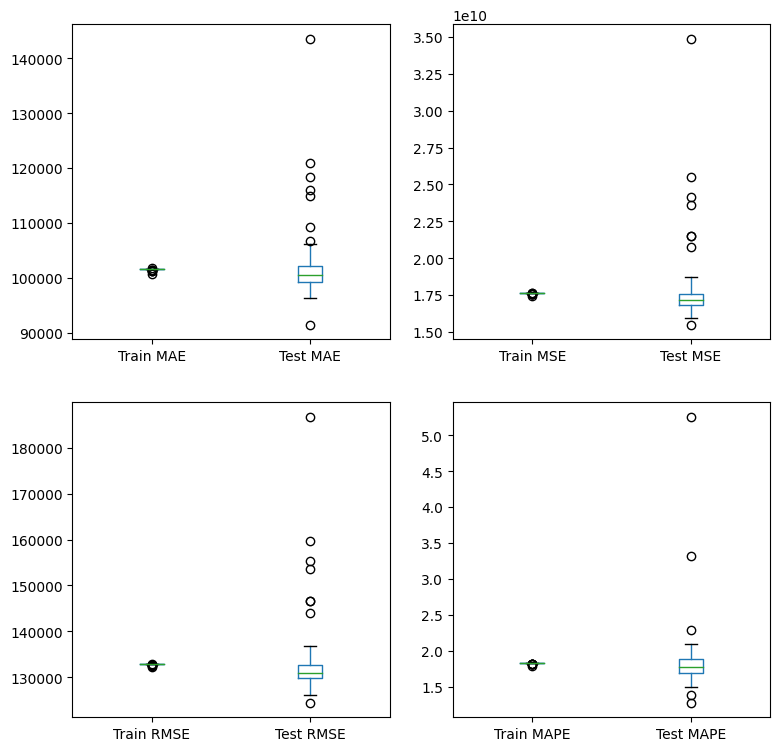

In [ ]:
plt.figure(figsize=(9, 9))

plt.subplot(2,2,1)
metricas.boxplot(column=["Train MAE", "Test MAE"], grid=False)

plt.subplot(2,2,2)
metricas.boxplot(column=["Train MSE", "Test MSE"], grid=False)

plt.subplot(2,2,3)
metricas.boxplot(column=["Train RMSE", "Test RMSE"], grid=False)

plt.subplot(2,2,4)
metricas.boxplot(column=["Train MAPE", "Test MAPE"], grid=False)
plt.show()

In [ ]:
# Obtener coeficientes e intercepto
coeficientes = rl2.coef_
intercepto = rl2.intercept_

# Mostrar los resultados
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

Coeficientes: [-3024.34182469  2875.98070101   418.91198415  1430.52529482
 -2029.32560309   393.14462044 12449.58911741]
Intercepto: 134089.9105252932


In [ ]:
# Orden de las variables
Xe.head(1)

,regional_id,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad
4,0.12331,-0.219086,-0.103913,-0.210649,2.356666,-0.106047,-0.074503


In [ ]:
# Para el tarifario tendremos en cuenta la base antes de la seleccion de los modelos es decir dff
df_tar = dff.copy()

In [ ]:
# Calcular los expuestos, teniendo en cuenta las personas que cumplen con las condiciones de enfermedades
df_tar['expuestos'] = df_tar.groupby(
    [
        "edad",
        "regional_id",
        "reclamacion_desc",
        "cancer",
        "epoc",
        "diabetes",
        "hipertension",
        "enf_cardiovascular",
    ]
)["afiliado_id"].transform("nunique")

In [ ]:
# Eliminar variables que no vamos a necesitar
df_tar = df_tar.drop(
    [

        "afiliado_id",
        "numero_utilizaciones",
        "valor_utilizaciones",

    ],
    axis=1,
)

In [ ]:
# Verificar duplicados
df_tar.duplicated().sum()

0

In [ ]:
# Asignar un rango de edad en la base de datos
df_tar['rango_edad'] = df_tar['edad'].apply(lambda x: '[0,5)' if x>=0 and x<5
                                                  else ('[5,10)' if x>=5 and x<10
                                                  else ('[10,15)' if x>=10 and x<15
                                                  else ('[15,20)' if x>=15 and x<20
                                                  else ('[20,25)' if x>=20 and x<25
                                                  else ('[25,30)' if x>=25 and x<30
                                                  else ('[30,35)' if x>=30 and x<35
                                                  else ('[35,40)' if x>=35 and x<40
                                                  else ('[40,45)' if x>=40 and x<45
                                                  else ('[45,50)' if x>=45 and x<50
                                                  else ('[50,55)' if x>=50 and x<55
                                                  else ('[55,60)' if x>=55 and x<60
                                                  else ('[60,65)' if x>=60 and x<65
                                                  else ('[65,70)' if x>=65 and x<70
                                                  else ('[70,75)' if x>=70 and x<75
                                                  else ('[75,80)' if x>=75 and x<80
                                                  else ('[80,85)' if x>=80 and x<85
                                                  else ('[85,90)' if x>=85 and x<90
                                                  else '+90'))))))))))))))))))

In [ ]:
# Visualización de la tabla
df_tar.tail()

,reclamacion_cd,diagnostico_codigo,diagnostico_desc,reclamacion_desc,poliza_id,sexo_cd,regional_id,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,tiempo_reclamacion,tiempofin_reclamacion,expuestos,rango_edad
823591,R36,B230,SÍNDROME DE INFECCIÓN AGUDA DEBIDA A VIH,TRATAMIENTOS AMBULATORIOS ESPECIALES,95547342,2,20,0,0,0,0,0,59.19,329.0,27.0,1,"[55,60)"
823598,R3,F331,"TRASTORNO DEPRESIVO RECURRENTE, EPISODIO MODER...",ATENCION INTEGRAL DE SALUD MENTAL,93259727,1,50,0,0,0,1,0,66.13,260.0,96.0,1,"[65,70)"
823599,R3,F418,OTROS TRASTORNOS DE ANSIEDAD ESPECIFICADOS,ATENCION INTEGRAL DE SALUD MENTAL,89613365,2,50,0,0,0,0,0,9.56,244.0,112.0,1,"[5,10)"
823600,R27,S099,"TRAUMATISMO DE LA CABEZA, NO ESPECIFICADO",TRATAMIENTO MEDICO HOSPITALARIO POR ACCIDENTE,95666478,1,30,0,0,0,0,0,66.92,243.0,113.0,1,"[65,70)"
823610,R19,K021,CARIES DE LA DENTINA,ODONTOLOGÍA,107572977,2,20,0,0,0,0,0,33.45,335.0,21.0,1,"[30,35)"


In [ ]:
# Exportar archivo de excel con cantidad de expuestos
# Guardar el DataFrame en un archivo CSV
df_tar.to_csv('tarifario_1.csv', index=False)